# Extracting and Processing Well Log Properties
**Author:** Luis C. Baez L 
**Date:** January 2024 - December 2024  
**Description:** A comprehensive workflow to extract, preprocess, visualize, and merge well logs for geophysical analysis and machine learning.

This notebook provides a step-by-step guide for handling well-log data, focusing on:  
- Extracting information from LAS files.  
- Preprocessing logs by standardizing depth, handling missing values, and outliers.  
- Visualizing data for quality inspection.  
- Merging logs into a unified dataset ready for downstream analysis.  

The goal is to produce a clean and structured dataset that supports geophysical modeling or predictive analytics.



## Table of Contents

1. [Introduction](#1-introduction)
2. [Well-log Data](#2-well-log-data)
3. [Setup](#3-setup)
4. [Step 1: Extract Log Data](#4-step-1-extract-log-data)
5. [Step 2: Check Available Logs and Properties](#5-step-2-check-available-logs-and-properties)
6. [Step 3: Standardize Depth Units](#6-step-3-standardize-depth-units)
7. [Step 4: Visualize Logs for Inspection](#7-step-4-visualize-logs-for-inspection)
8. [Step 5: Select Definitive Logs for Each Well](#8-step-5-select-definitive-logs-for-each-well)
9. [Step 6: Merge Logs for Each Well](#9-step-6-merge-logs-for-each-well)
10. [Step 7: Visualize Final Properties](#10-step-7-visualize-final-properties)
11. [Step 8: Visualize Final Properties](#-11-Step-8-Save-Final-Dataset)

---

## 1. Introduction

This notebook handles well-log data and processes it step-by-step. The workflow involves:

- **Reading LAS files**: Extracting relevant information such as depth and log values.
- **Standardizing units**: Ensuring consistency in depth, porosity, and other measurements across logs from different sources.
- **Handling missing data and outliers**: Replacing invalid values and ensuring the dataset is clean and consistent.
- **Visualizing data**: Providing plots for quality inspection and identifying potential issues with the data.
- **Selecting definitive logs**: Choosing the best log file(s) for each property and well to create a clean dataset.
- **Merging logs**: Combining all the logs for each well into a unified dataset with consistent formatting.
- **Saving the final dataset**: Exporting the processed dataset for further geophysical modeling or machine learning.

This structured approach ensures that the final dataset is ready for downstream analysis while maintaining data quality and consistency.


---

## 2. Well-log Data:

The well-log data processing workflow aims to address key challenges such as:
- Standardizing units across logs from different sources.
- Handling missing data and outliers to ensure a consistent dataset.
- Visualizing and inspecting data to verify its quality and completeness.

This structured approach ensures that the final dataset is ready for downstream analysis, such as geophysical modeling or machine learning.


### Properties:

| Property       | Unit                 | Parameters                                        |
|----------------|----------------------|---------------------------------------------------|
| Gamma Ray      | GAPI                 | GR                                                |
| Bulk Density   | G/C3                 | ZDEN, DNLS, RHOB, D, DEN                          |
| Porosity       | % or .frac or .V/V   | PORE, NPH, NPHI, P, NPOR, SNP, SPH, SPHI          |
| Sonic Logs     | US/F                 | DT, DTS, DTC, DTCM, DTSD, DTSF, DTSM, DTDS, DTSS  |


---


## 3. Setup
Import necessary modules and define global variables.


In [1]:
# Import libraries
import sys
sys.path.append("../.")

from geothermal_prediction.data_loader import generate_log_data
from geothermal_prediction.preprocessing import (
    check_logs_by_properties,
    standardize_all_logs,
    select_logs_with_depth,
    merge_logs_for_all_wells
)
from geothermal_prediction.visualization import (
    plot_file_logs,
    plot_selected_logs,
    plot_properties_by_well
)

from geothermal_prediction.utils import save_to_csv


In [2]:
# Define wells and logs
list_wells = ['E18-05', 'K18-07x', 'K18-08', 'ZRP-03a', 'Q11-03']
list_logs = ['GR', 
             'ZDEN', 'DNLS', 'RHOB', 'D', 'DEN',
             'PORE', 'NPH', 'NPHI', 'P', 'NPOR',
             'DT', 'DTC']

# Define property mapping
property_mapping = {
    'Gamma_Ray': ['GR'],
    'Bulk_Density': ['ZDEN', 'DNLS', 'RHOB', 'D', 'DEN'],
    'Porosity': ['PORE', 'NPH', 'NPHI', 'P', 'NPOR', 'SNP', 'SPH', 'SPHI'],
    'Sonic_Log': ['DT', 'DTS', 'DTC', 'DTCM', 'DTSD', 'DTSF', 'DTSM', 'DTDS', 'DTSS']
}


---

## 4. Step 1: Extract Log Data

Logs are extracted from LAS files and structured into a dictionary for further processing. Each well's logs are stored as separate DataFrames, enabling detailed analysis and inspection.


In [3]:
log_data = generate_log_data(list_wells, list_logs)

0it [00:00, ?it/s]

13it [00:01, 15.44it/s]Only engine='normal' can read wrapped files
18it [00:05,  2.12it/s]Only engine='normal' can read wrapped files
21it [00:08,  1.21it/s]Only engine='normal' can read wrapped files
22it [00:11,  1.41s/it]Only engine='normal' can read wrapped files
29it [00:13,  2.61it/s]Only engine='normal' can read wrapped files
39it [00:15,  6.69it/s]Only engine='normal' can read wrapped files
46it [00:19,  1.65it/s]Only engine='normal' can read wrapped files
49it [00:22,  1.06it/s]Only engine='normal' can read wrapped files
50it [00:25,  1.58s/it]Only engine='normal' can read wrapped files
64it [00:28,  6.22it/s]Only engine='normal' can read wrapped files
67it [00:29,  3.28it/s]Only engine='normal' can read wrapped files
70it [00:35,  1.98it/s]
53it [00:04, 11.69it/s]
55it [00:05,  6.20it/s]Only engine='normal' can read wrapped files
57it [00:06,  3.58it/s]Only engine='normal' can read wrapped files
70it [00:08,  8.69it/s]
0it [00:00, ?it/s]Only engine='normal' can read wrapped f

---

## 5. Step 2: Check Available Logs and Properties

This step groups logs by their associated properties (e.g., Gamma Ray, Bulk Density) and provides a summary of available data for each well. This summary helps identify missing logs or inconsistencies before standardization.


In [4]:
summary = check_logs_by_properties(log_data, list_wells, property_mapping)

Logs available for each well grouped by properties:

E18-05:
  Gamma_Ray: GR
  Bulk_Density: RHOB
  Porosity: NPHI
  Sonic_Log: DT

K18-07x:
  Gamma_Ray: GR
  Bulk_Density: DNLS
  Porosity: PORE
  Sonic_Log: DT

K18-08:
  Gamma_Ray: GR
  Bulk_Density: ZDEN
  Porosity: PORE
  Sonic_Log: DT, DTC

ZRP-03a:
  Gamma_Ray: GR
  Bulk_Density: DEN
  Porosity: NPHI, NPOR
  Sonic_Log: DT, DTC

Q11-03:
  Gamma_Ray: GR
  Bulk_Density: RHOB
  Porosity: NPHI
  Sonic_Log: DT



---

## 6. Step 3: Cleaning and Standardize Units

This step involves:
- Standardizing depth to meters for consistency.
- Handling outliers and missing values.
- Converting porosity to a fraction (0-1) for uniformity.
This ensures the data is clean and ready for analysis.

In [5]:
standardized_log_data = standardize_all_logs(log_data, property_mapping)

---

## 7. Step 4: Visualize Logs for Inspection

Visualizations help verify data integrity. Look for:
- Continuity in logs without significant gaps.
- Depth ranges covered by each log.
- Presence of unexpected outliers or missing data.
This step ensures that the logs are usable before merging.



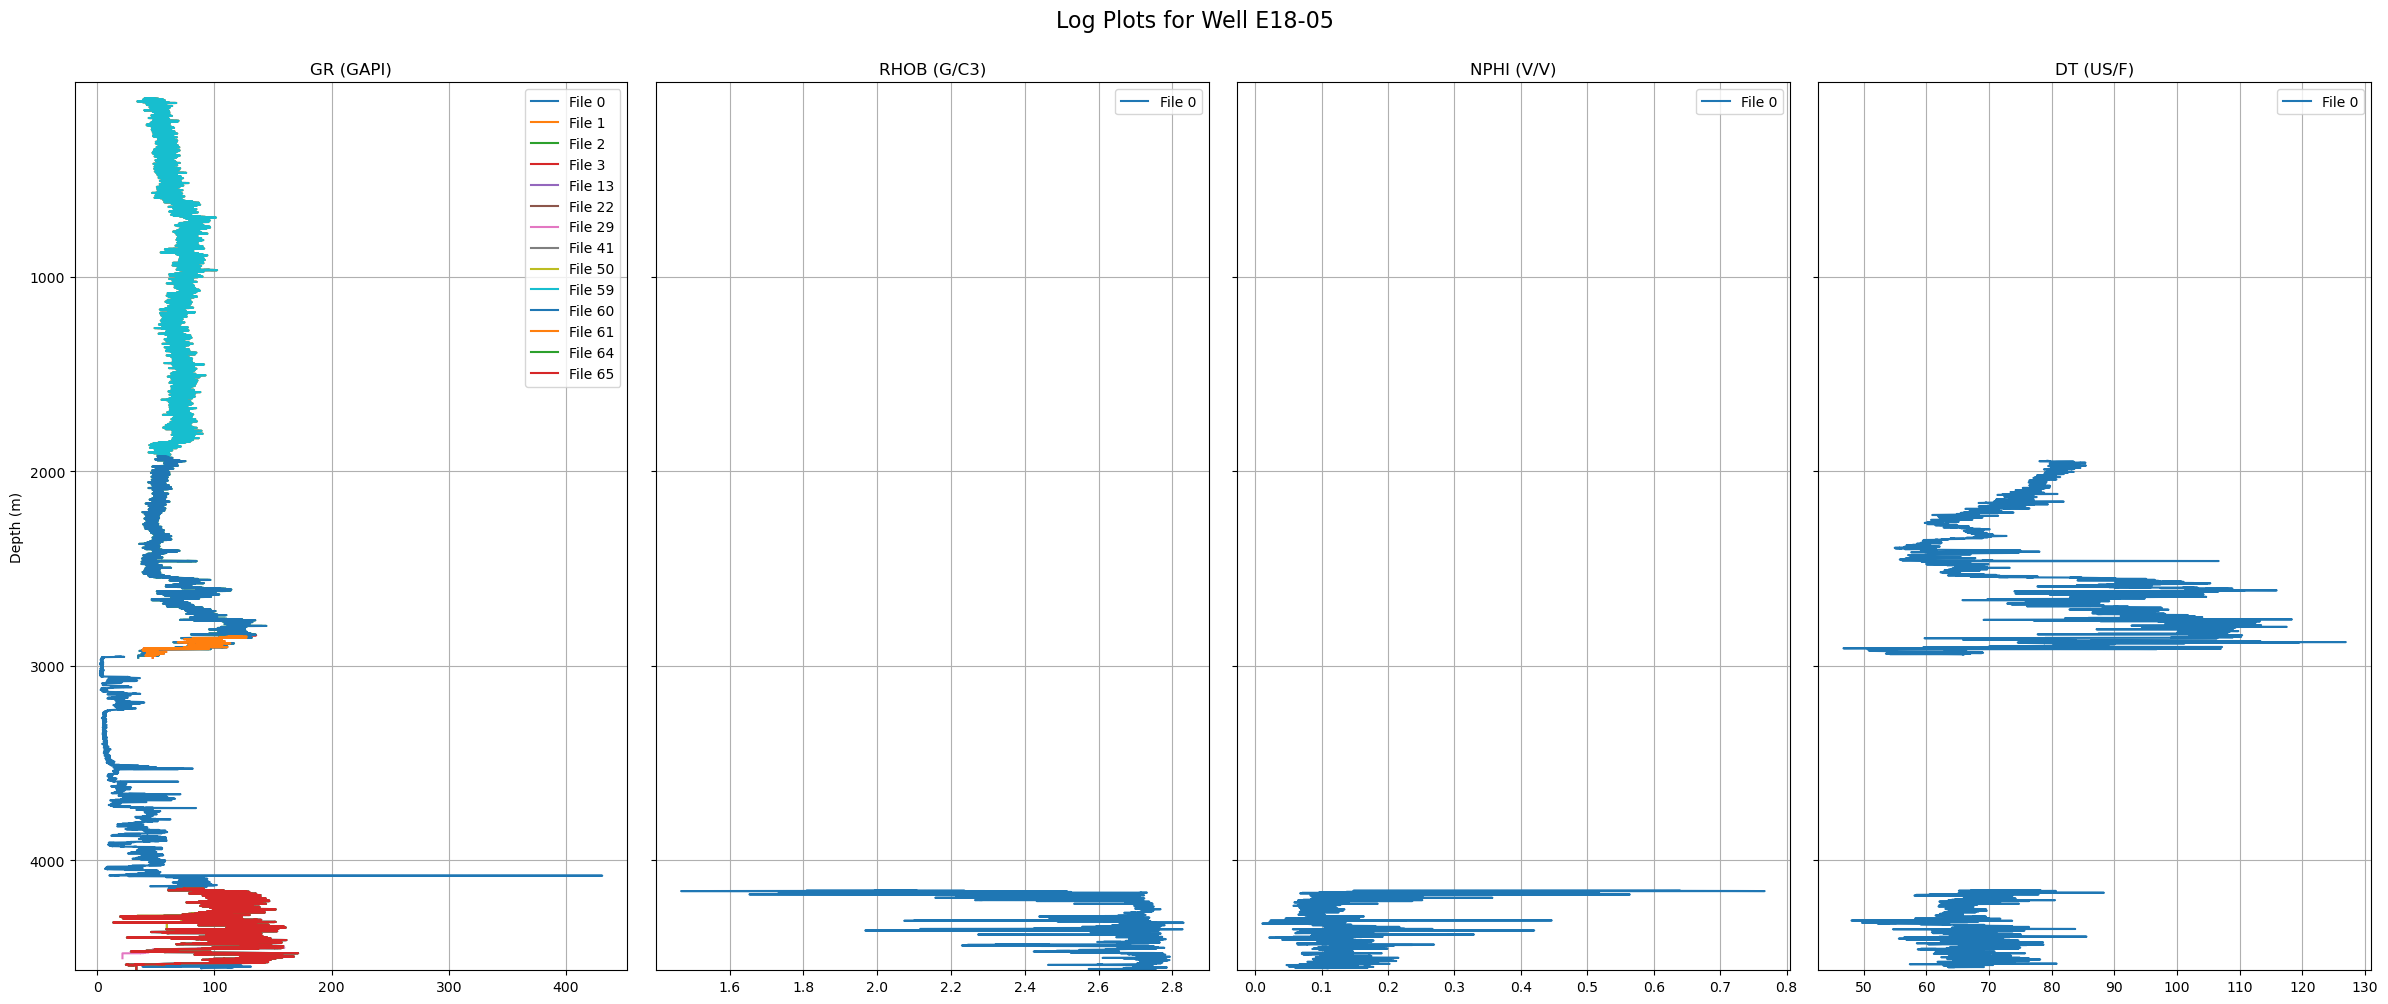

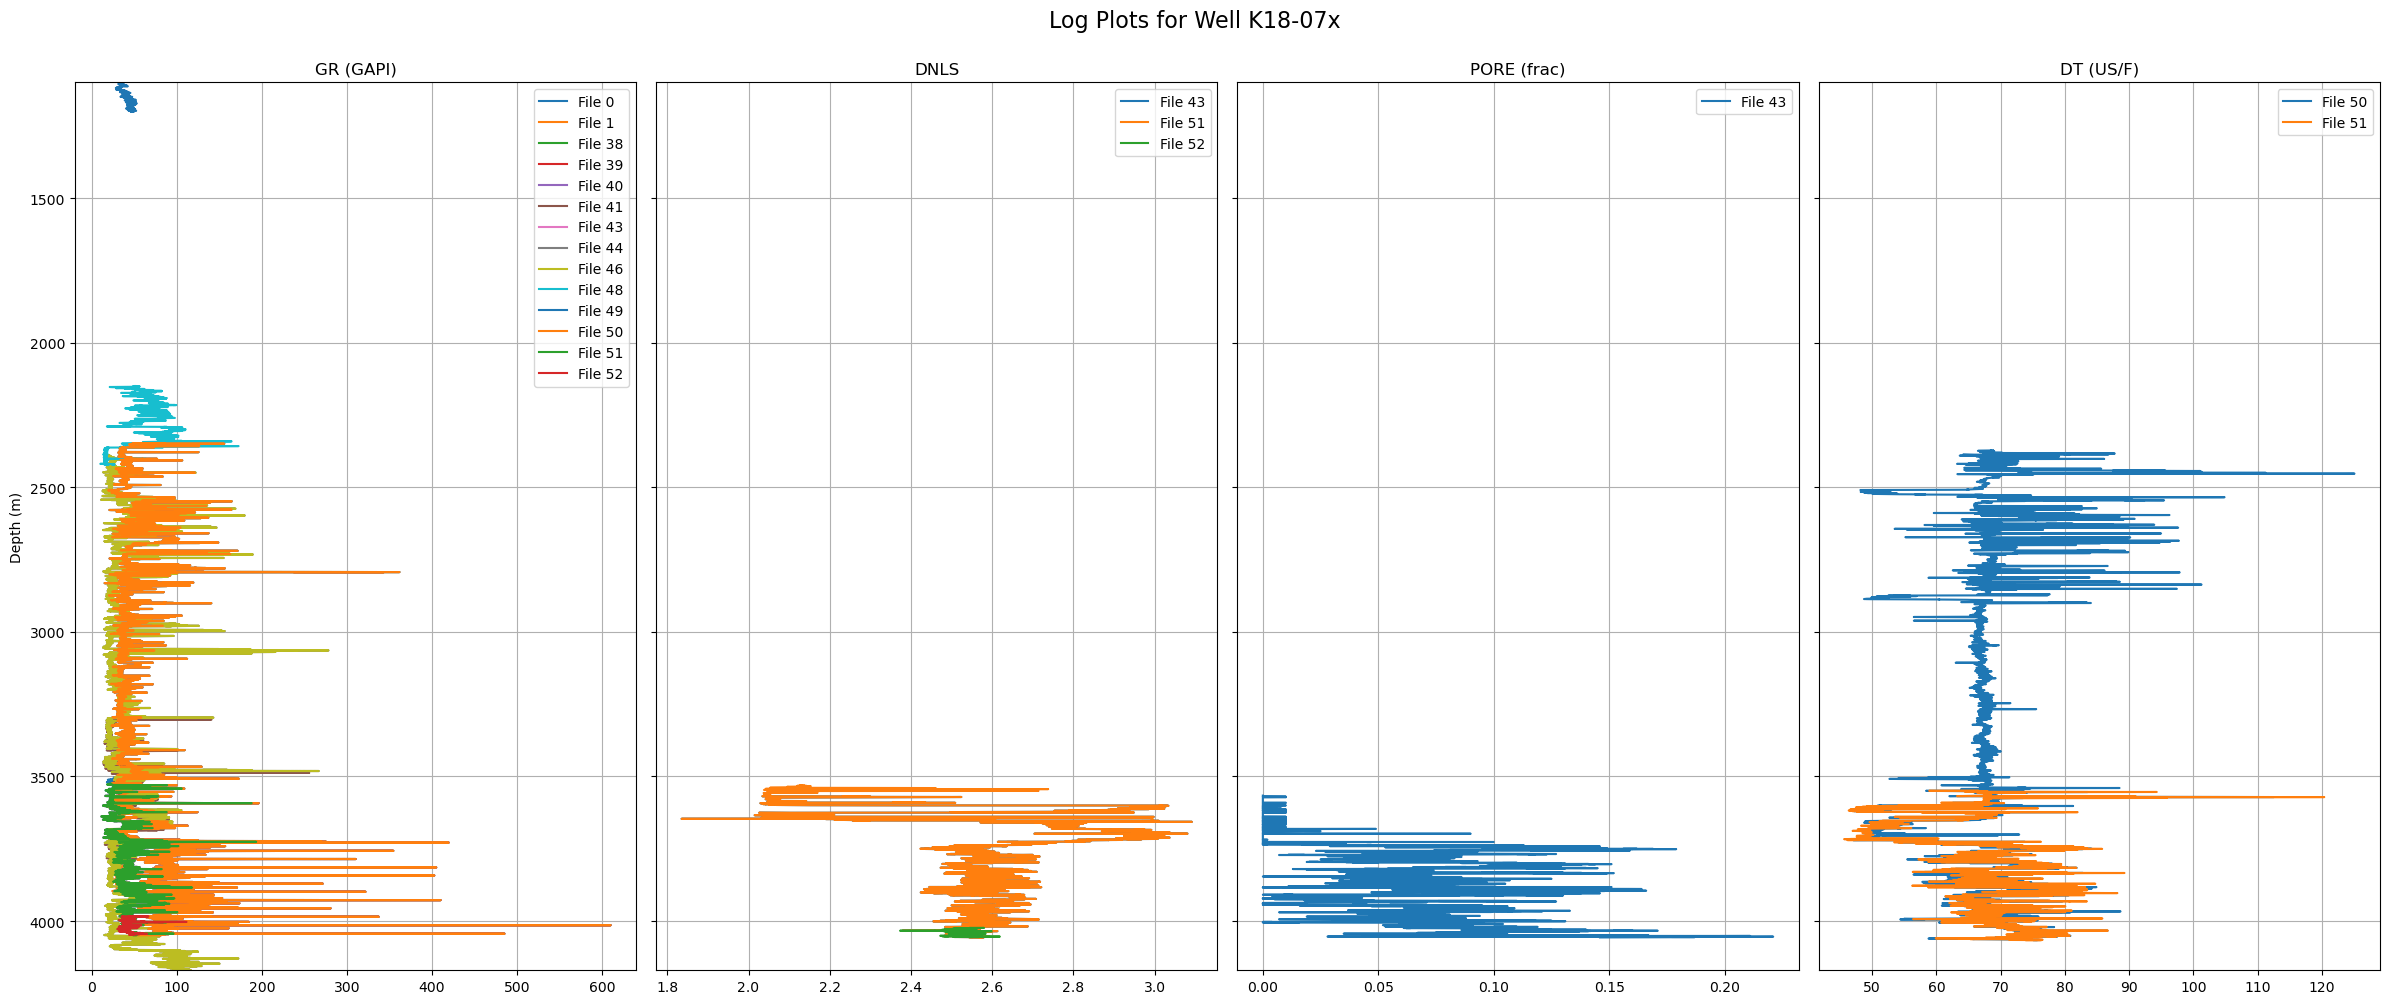

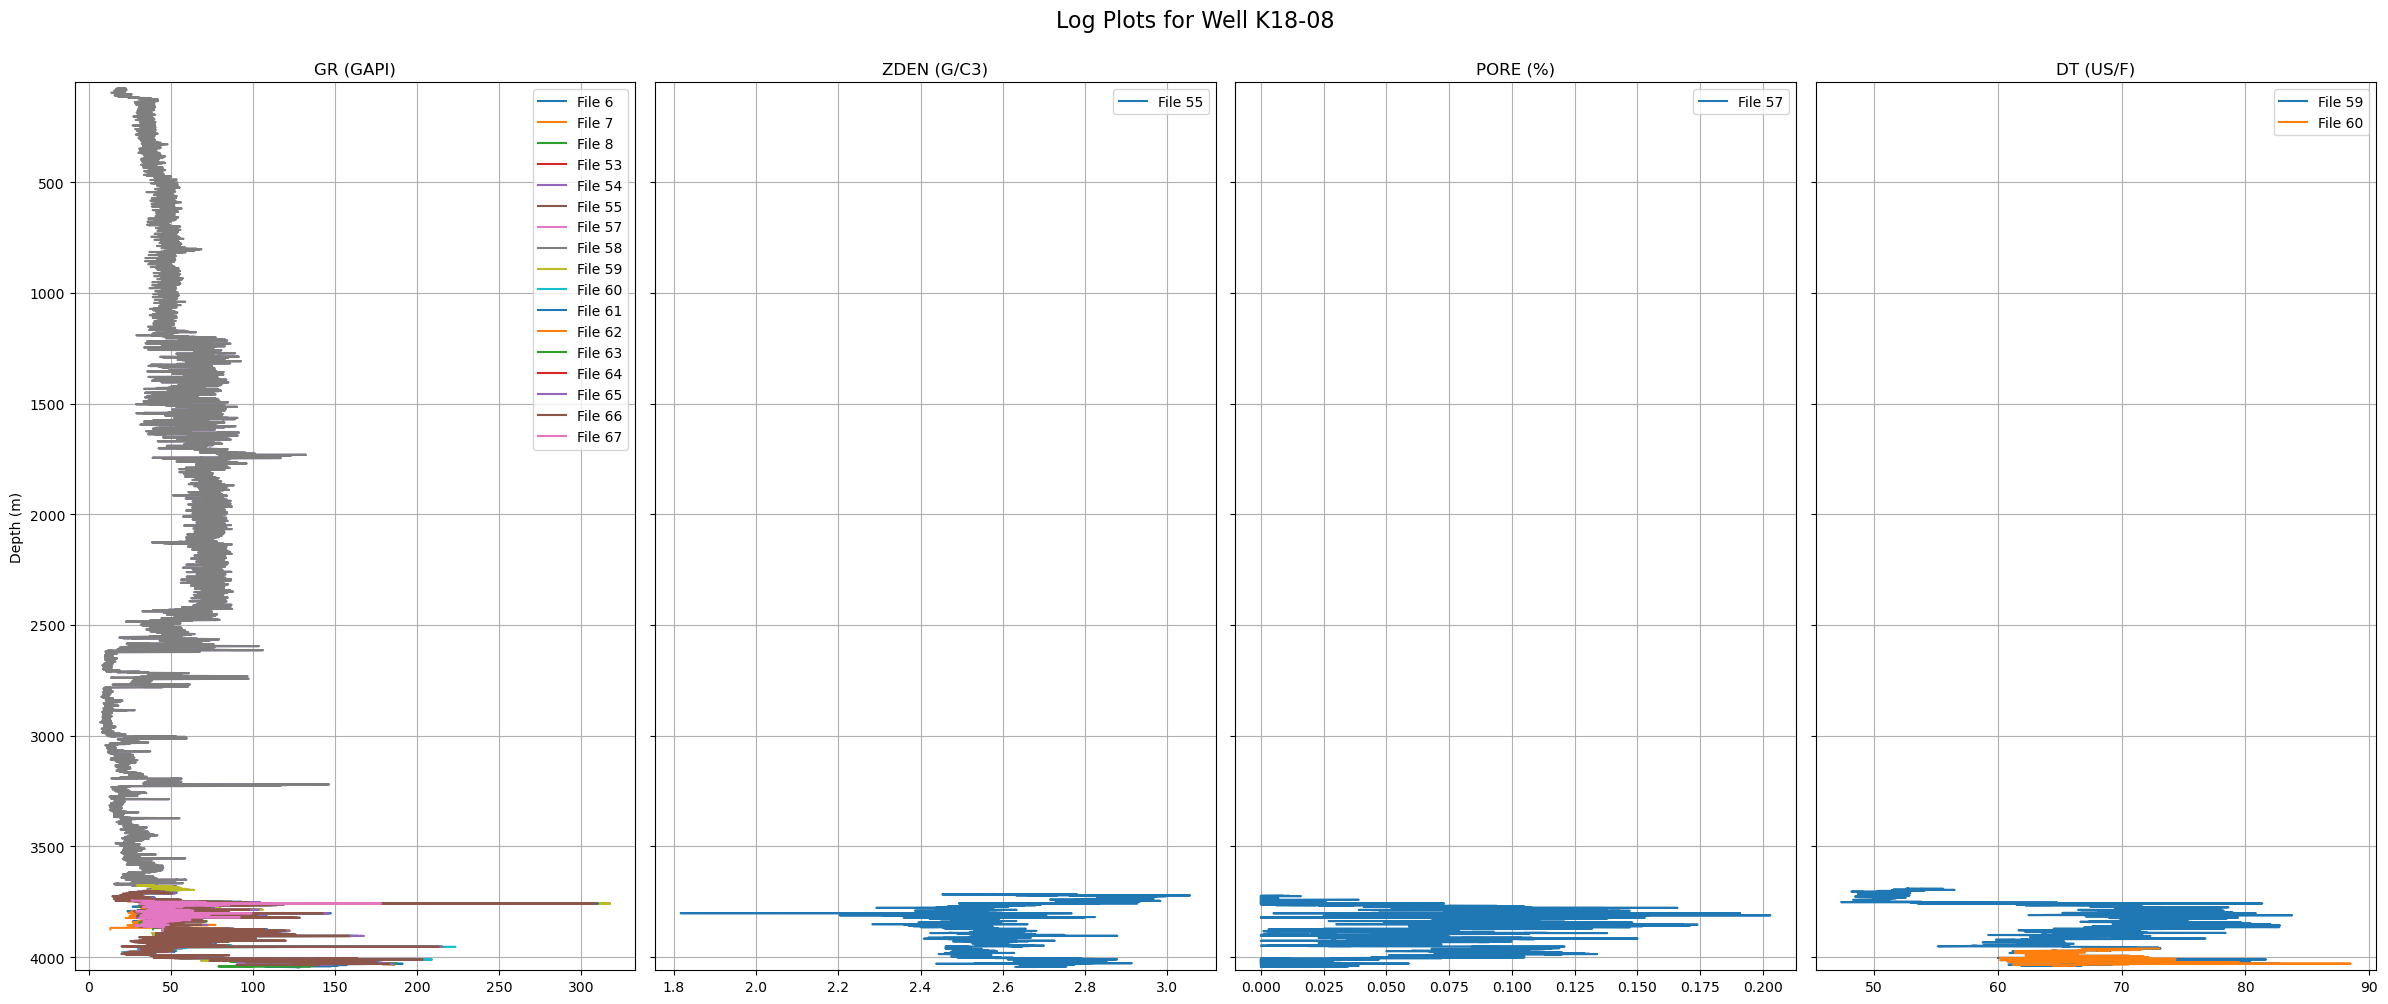

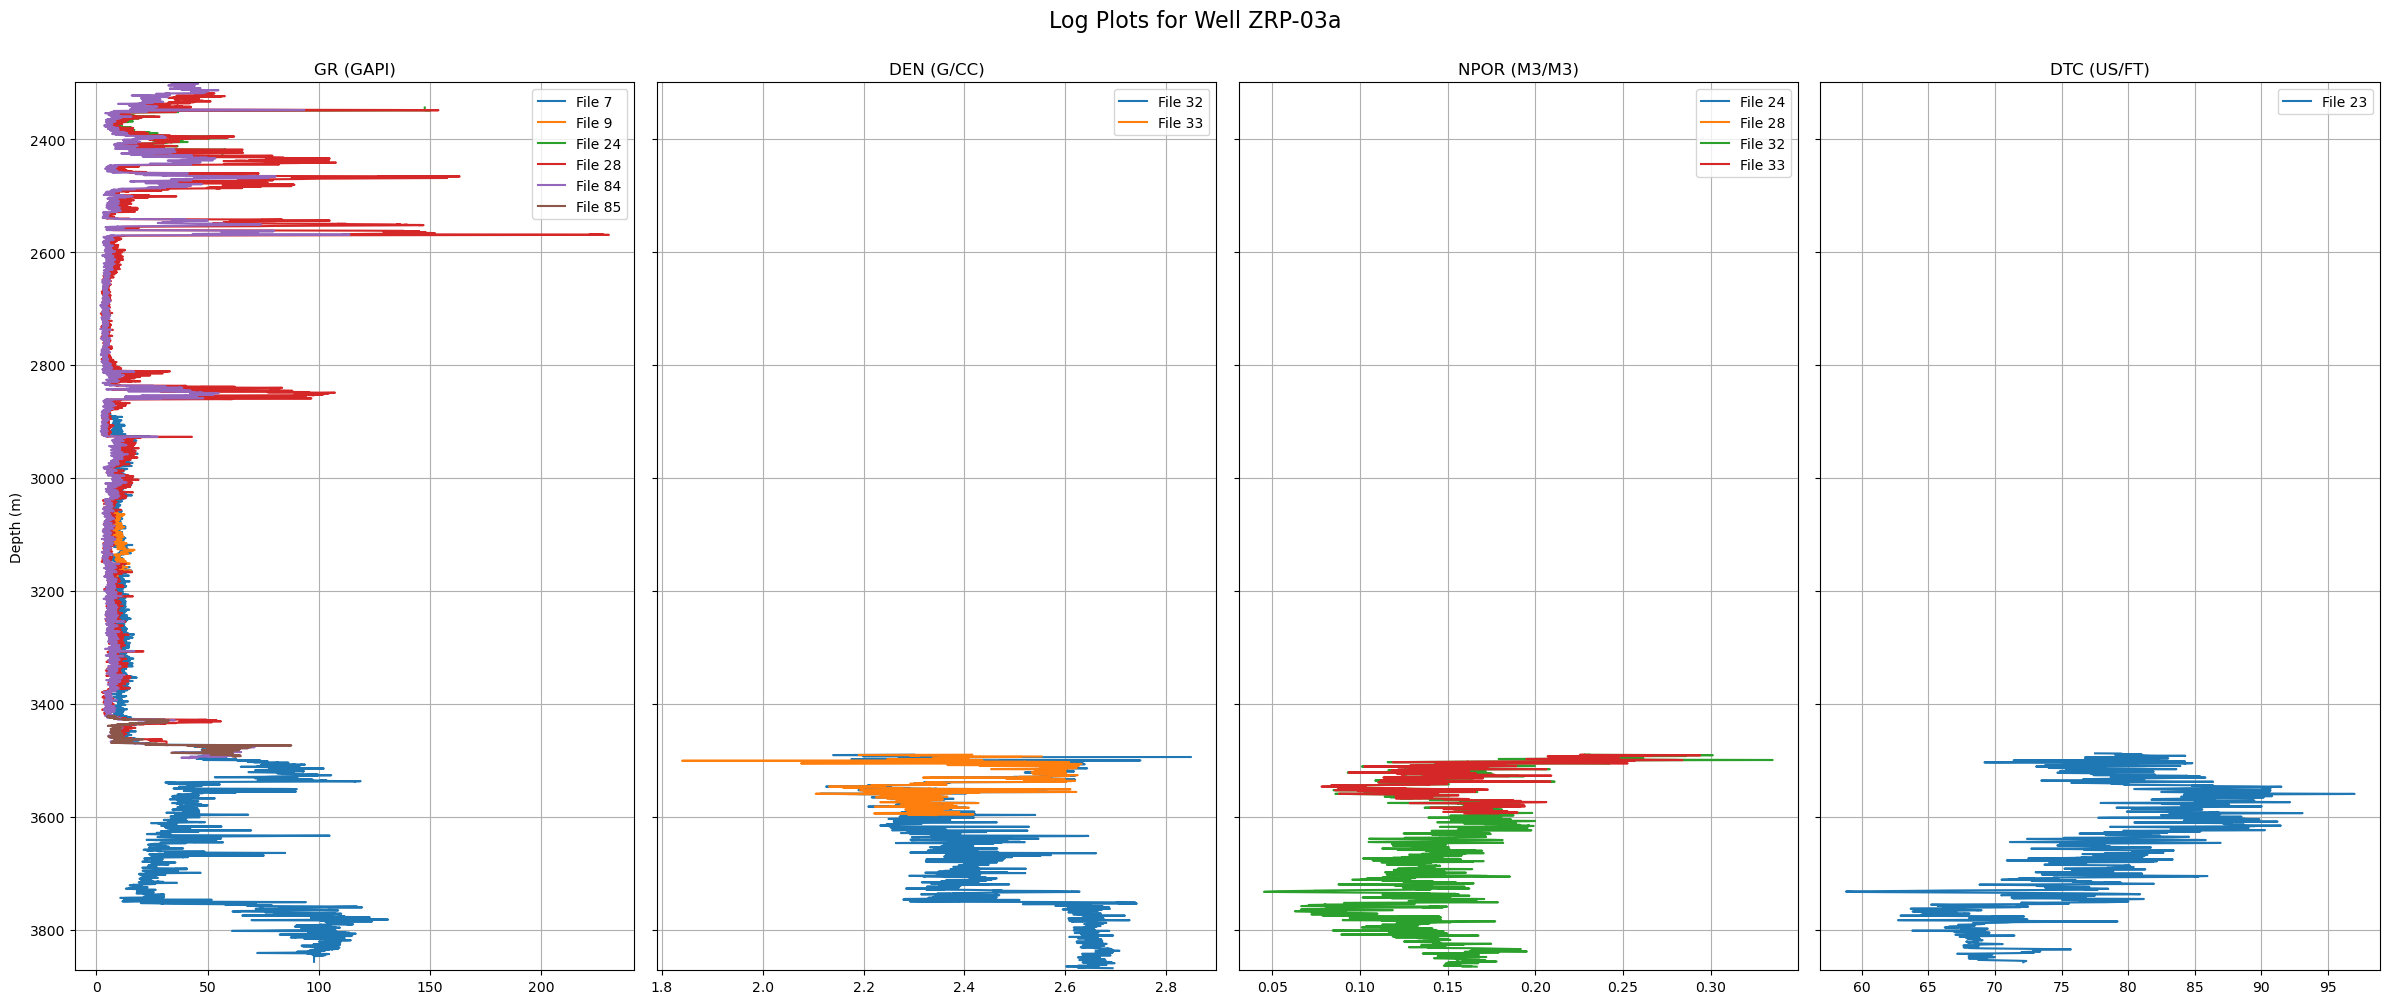

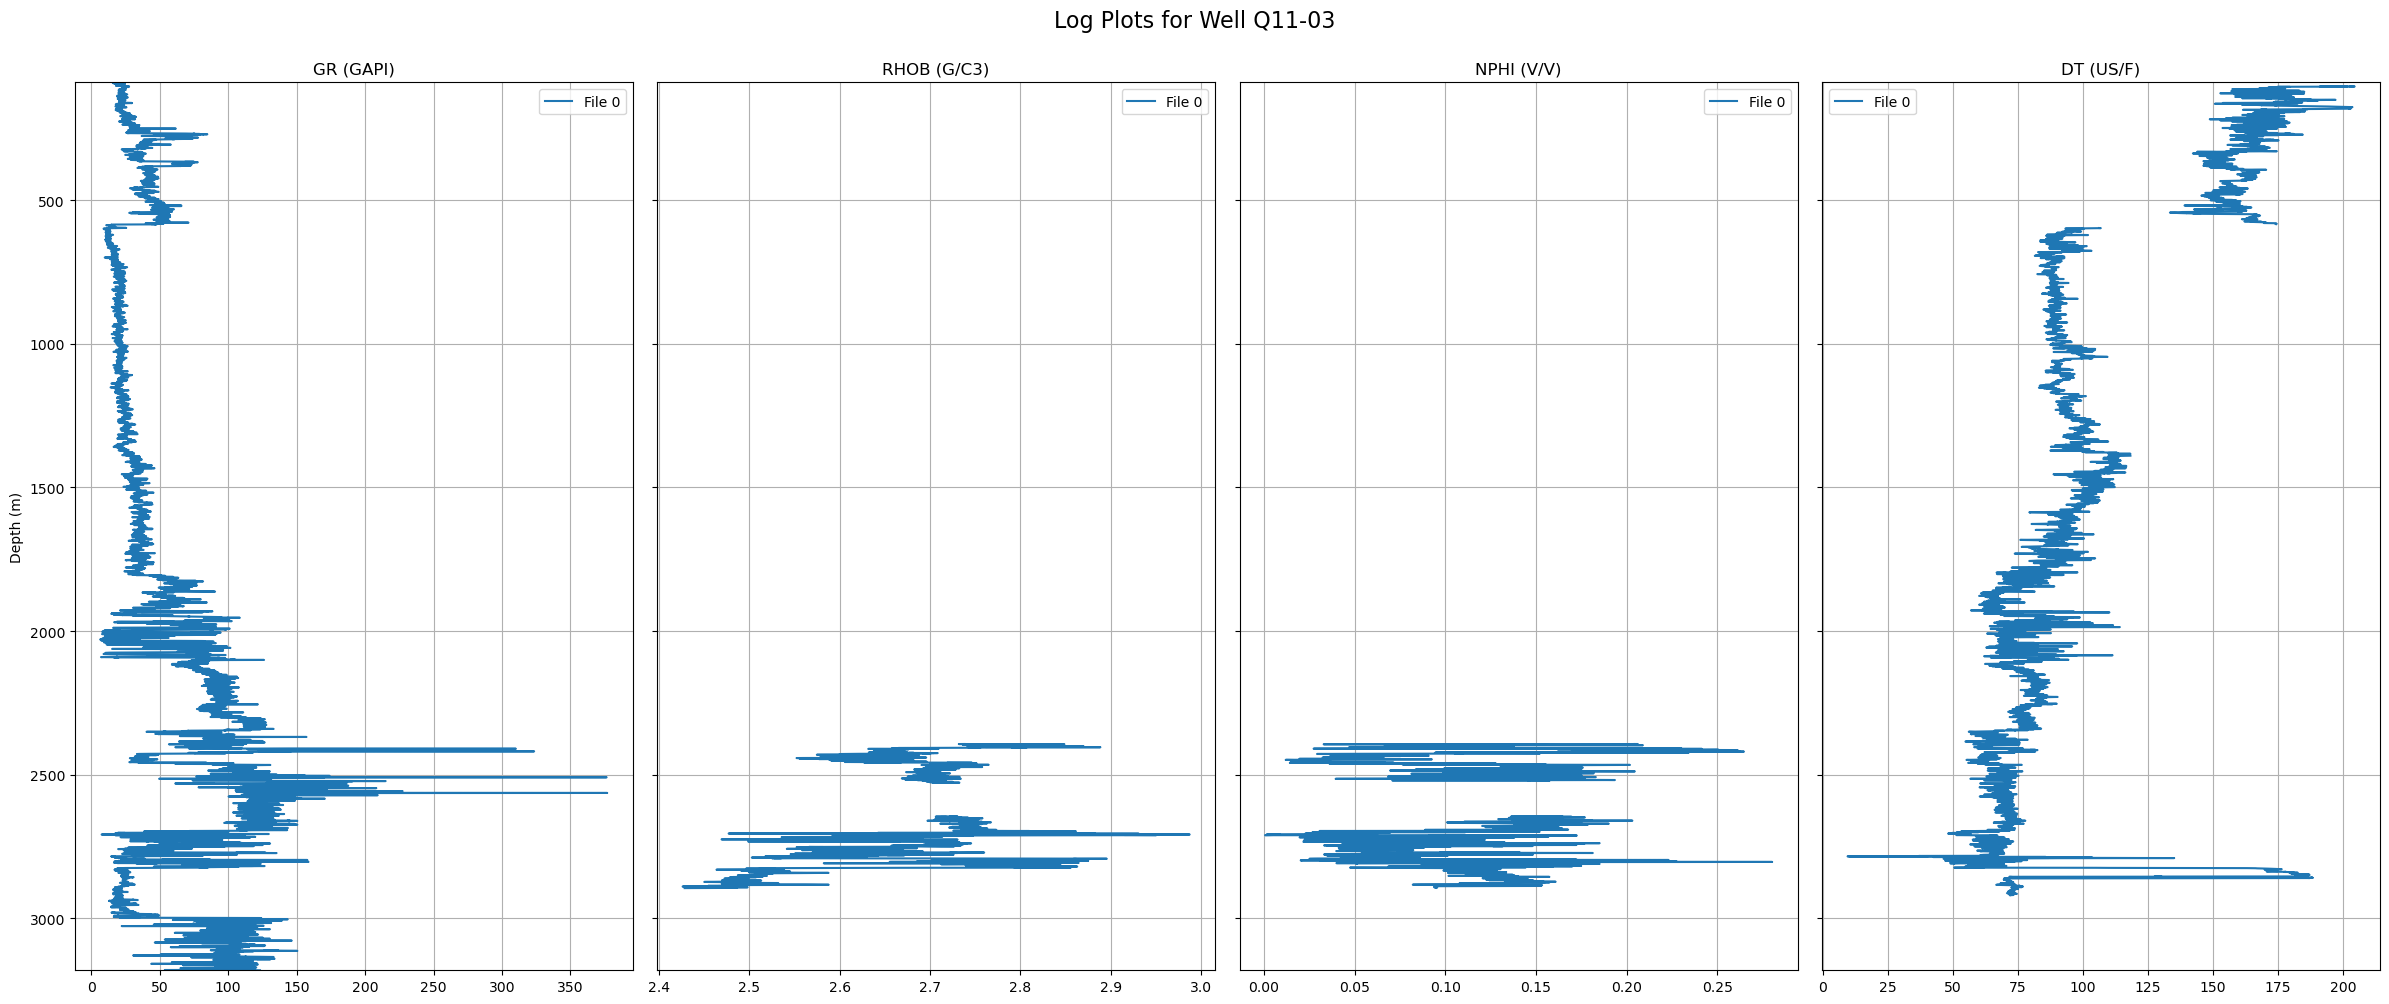

In [6]:
plot_file_logs(standardized_log_data, 'E18-05', ['GR', 'RHOB', 'NPHI', 'DT'])
plot_file_logs(standardized_log_data, 'K18-07x', ['GR', 'DNLS', 'PORE', 'DT'])
plot_file_logs(standardized_log_data, 'K18-08', ['GR', 'ZDEN', 'PORE', 'DT'])
plot_file_logs(standardized_log_data, 'ZRP-03a', ['GR', 'DEN', 'NPOR', 'DTC'])
plot_file_logs(standardized_log_data, 'Q11-03', ['GR', 'RHOB', 'NPHI', 'DT'])


---

## 8. Step 5: Select Definitive Logs for Each Well

Manually select the most reliable logs for each property and well. This step allows you to:
- Exclude logs with poor quality or incomplete depth coverage.
- Focus on the best data sources for merging and analysis.

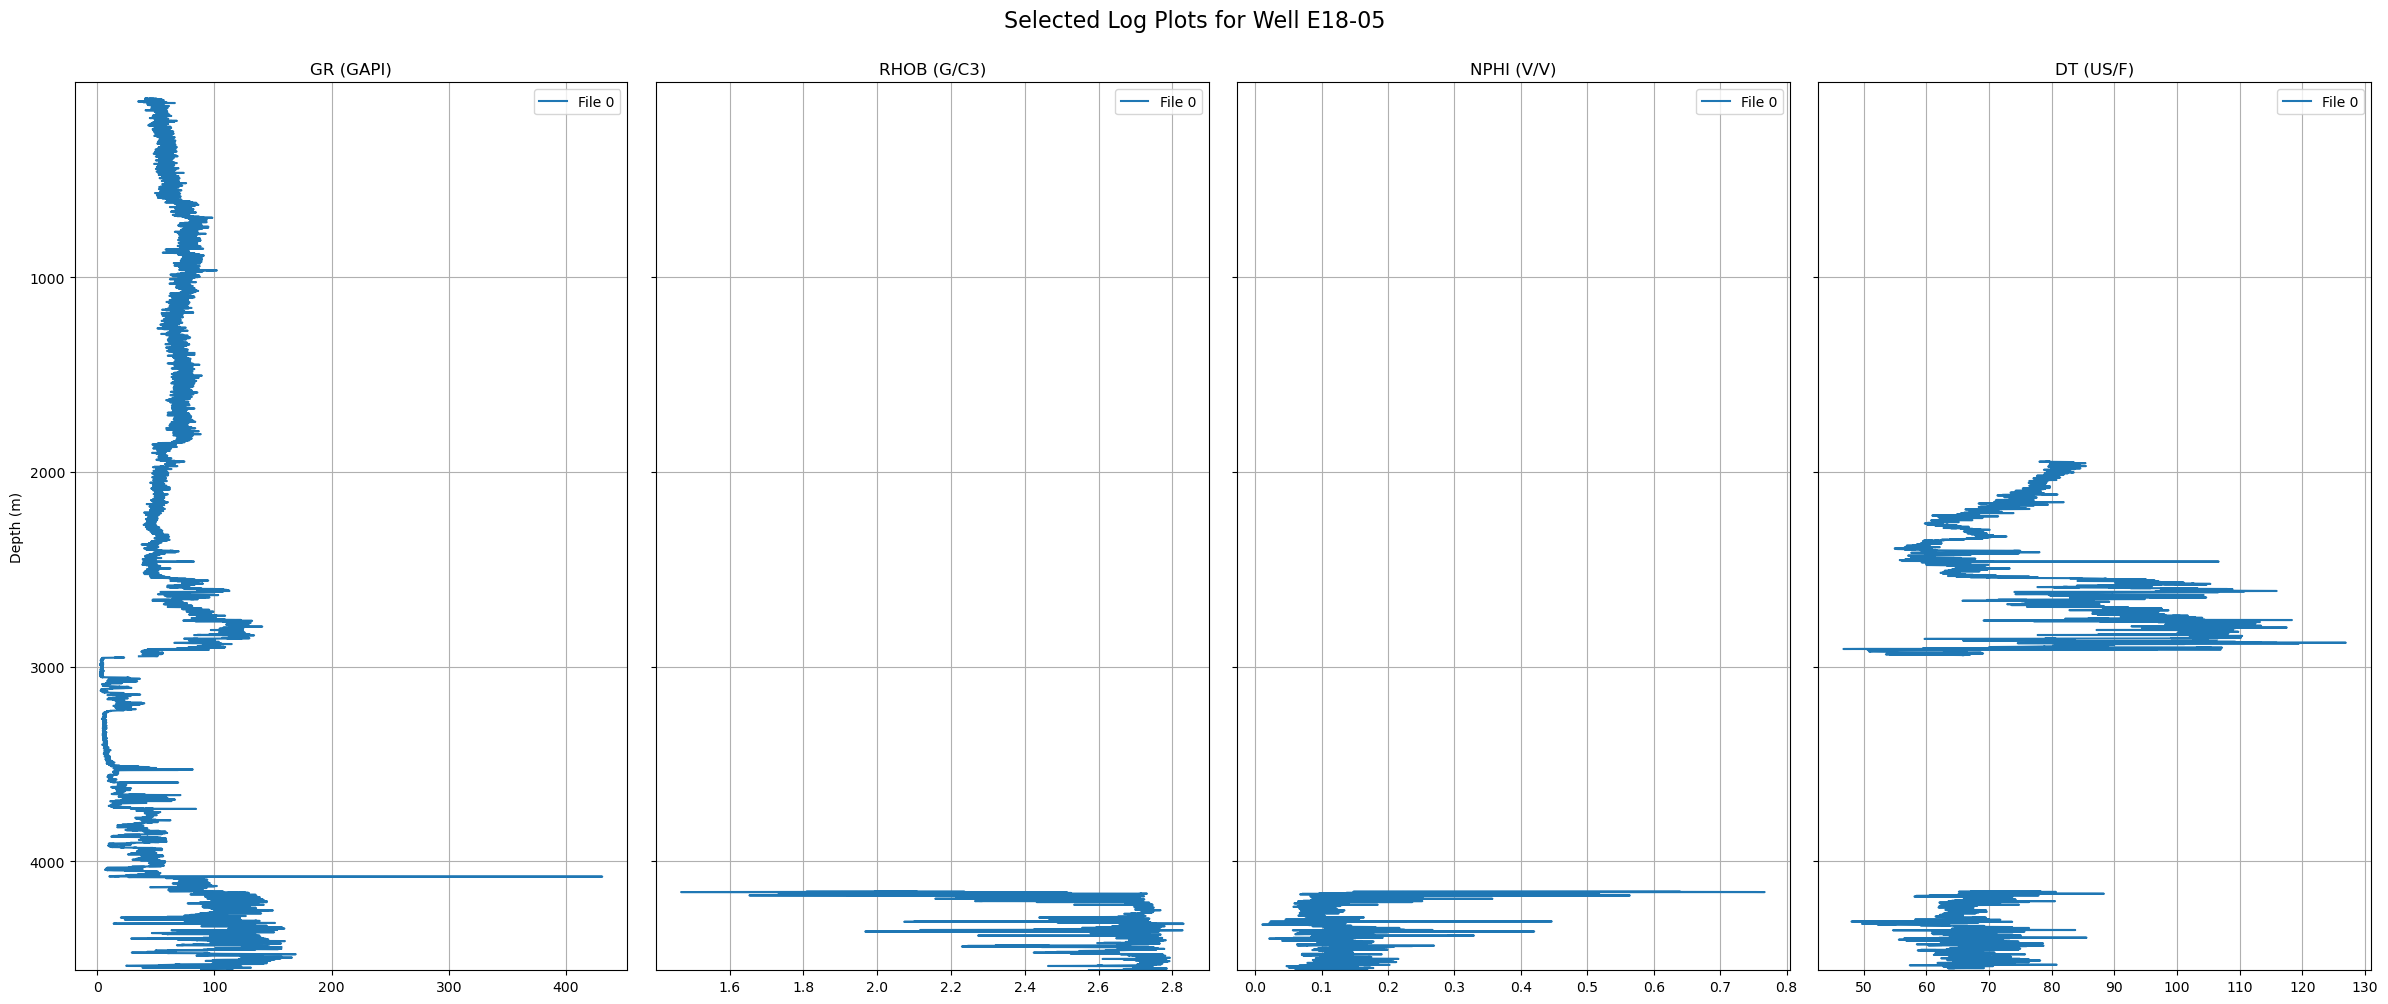

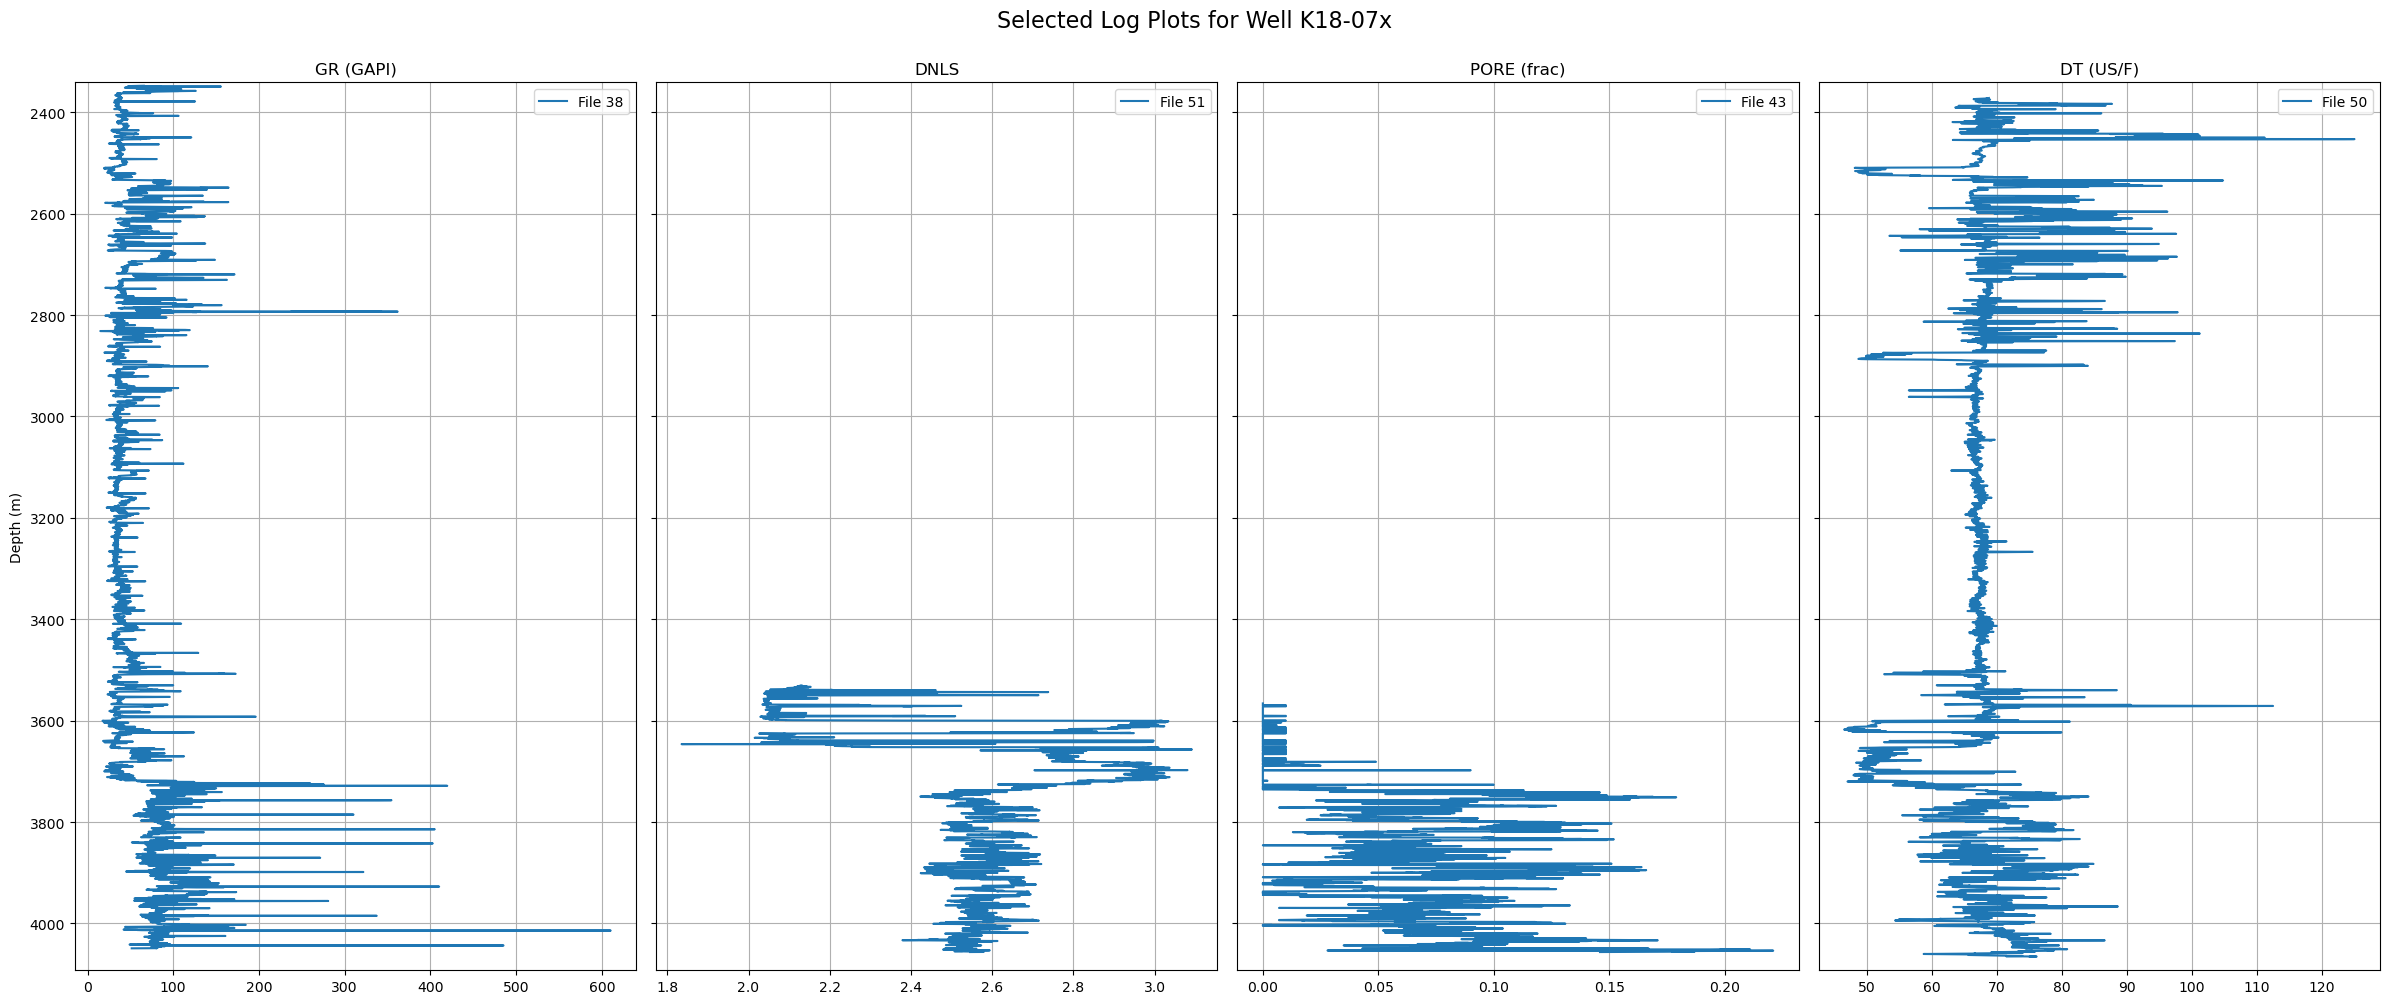

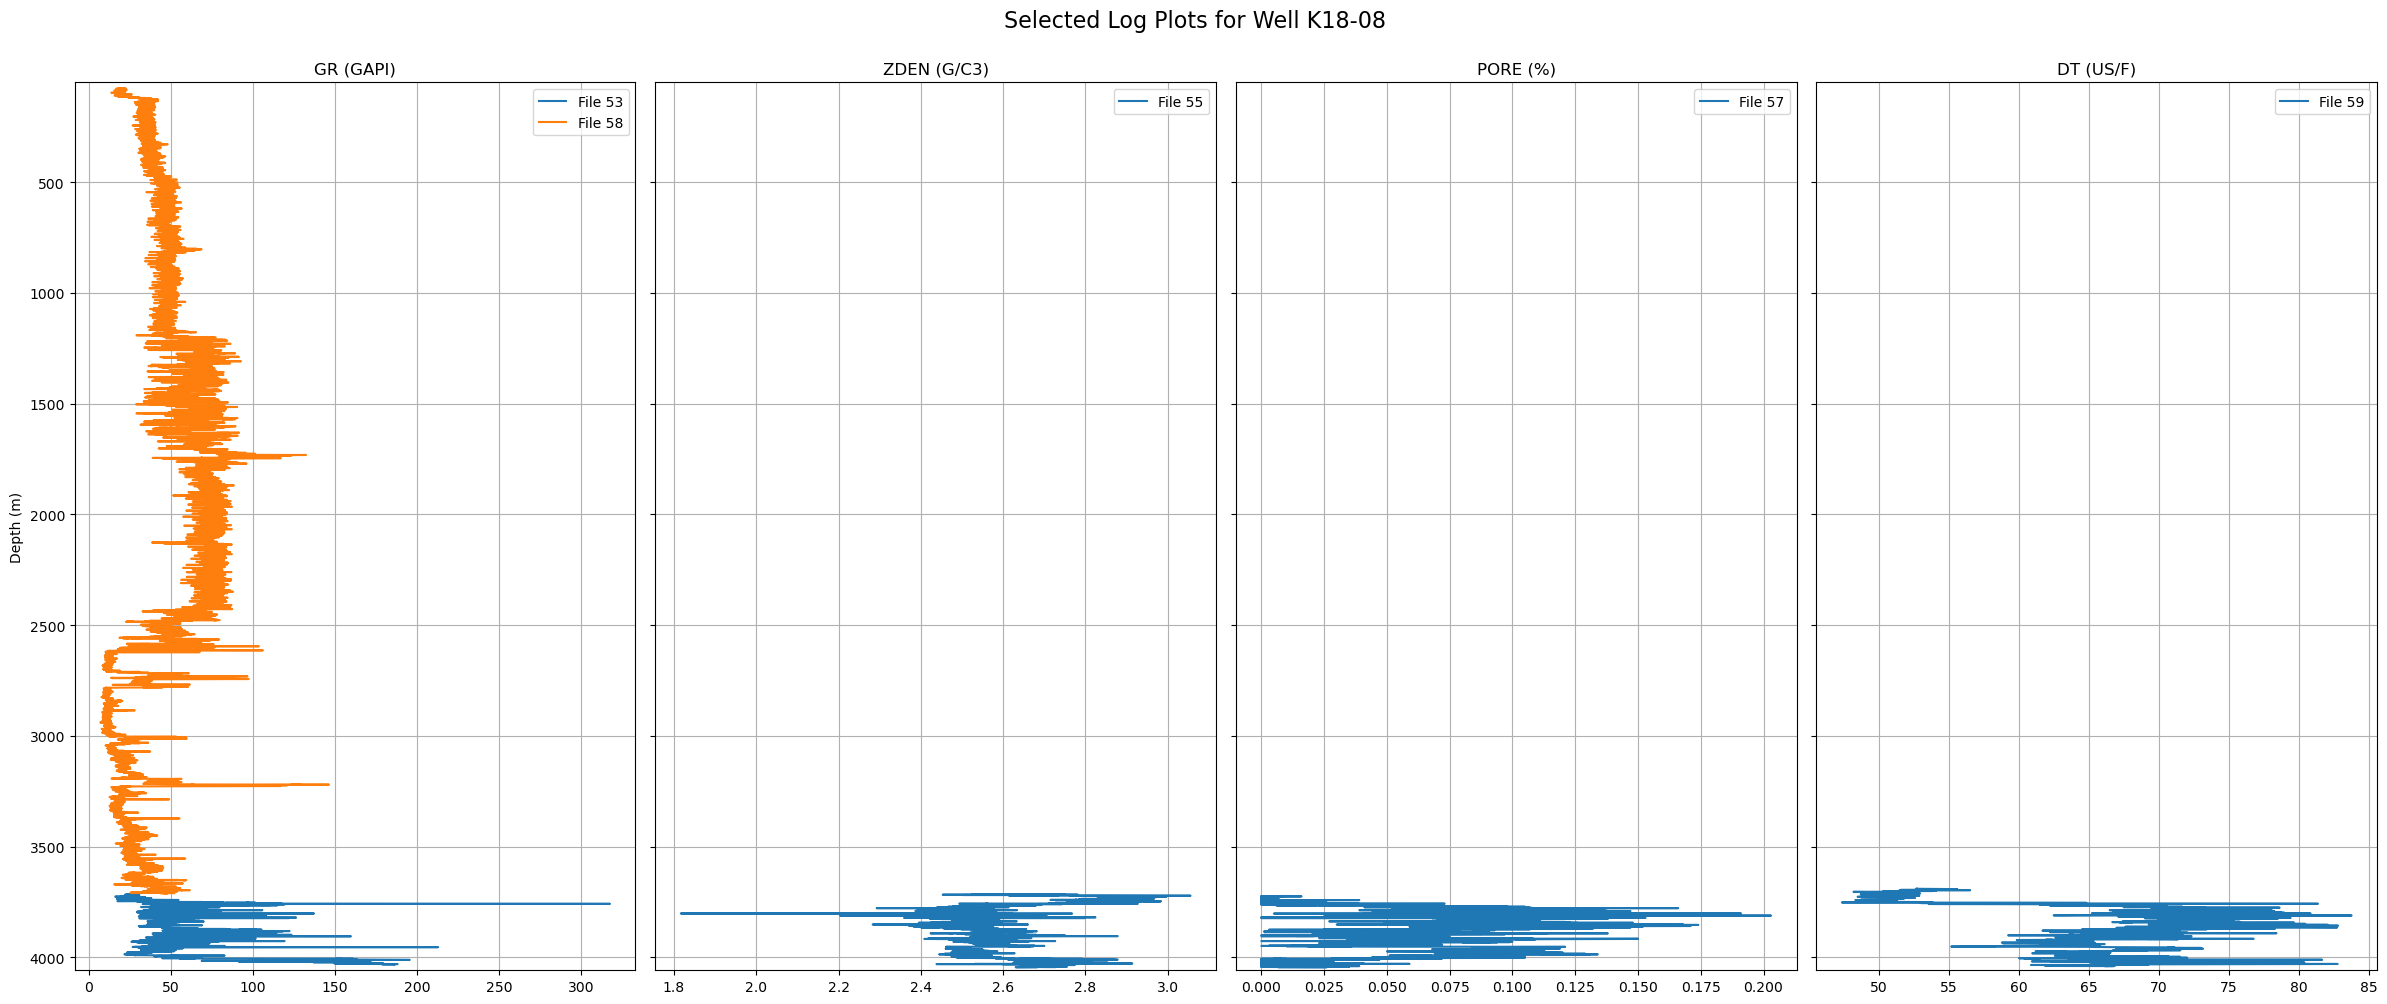

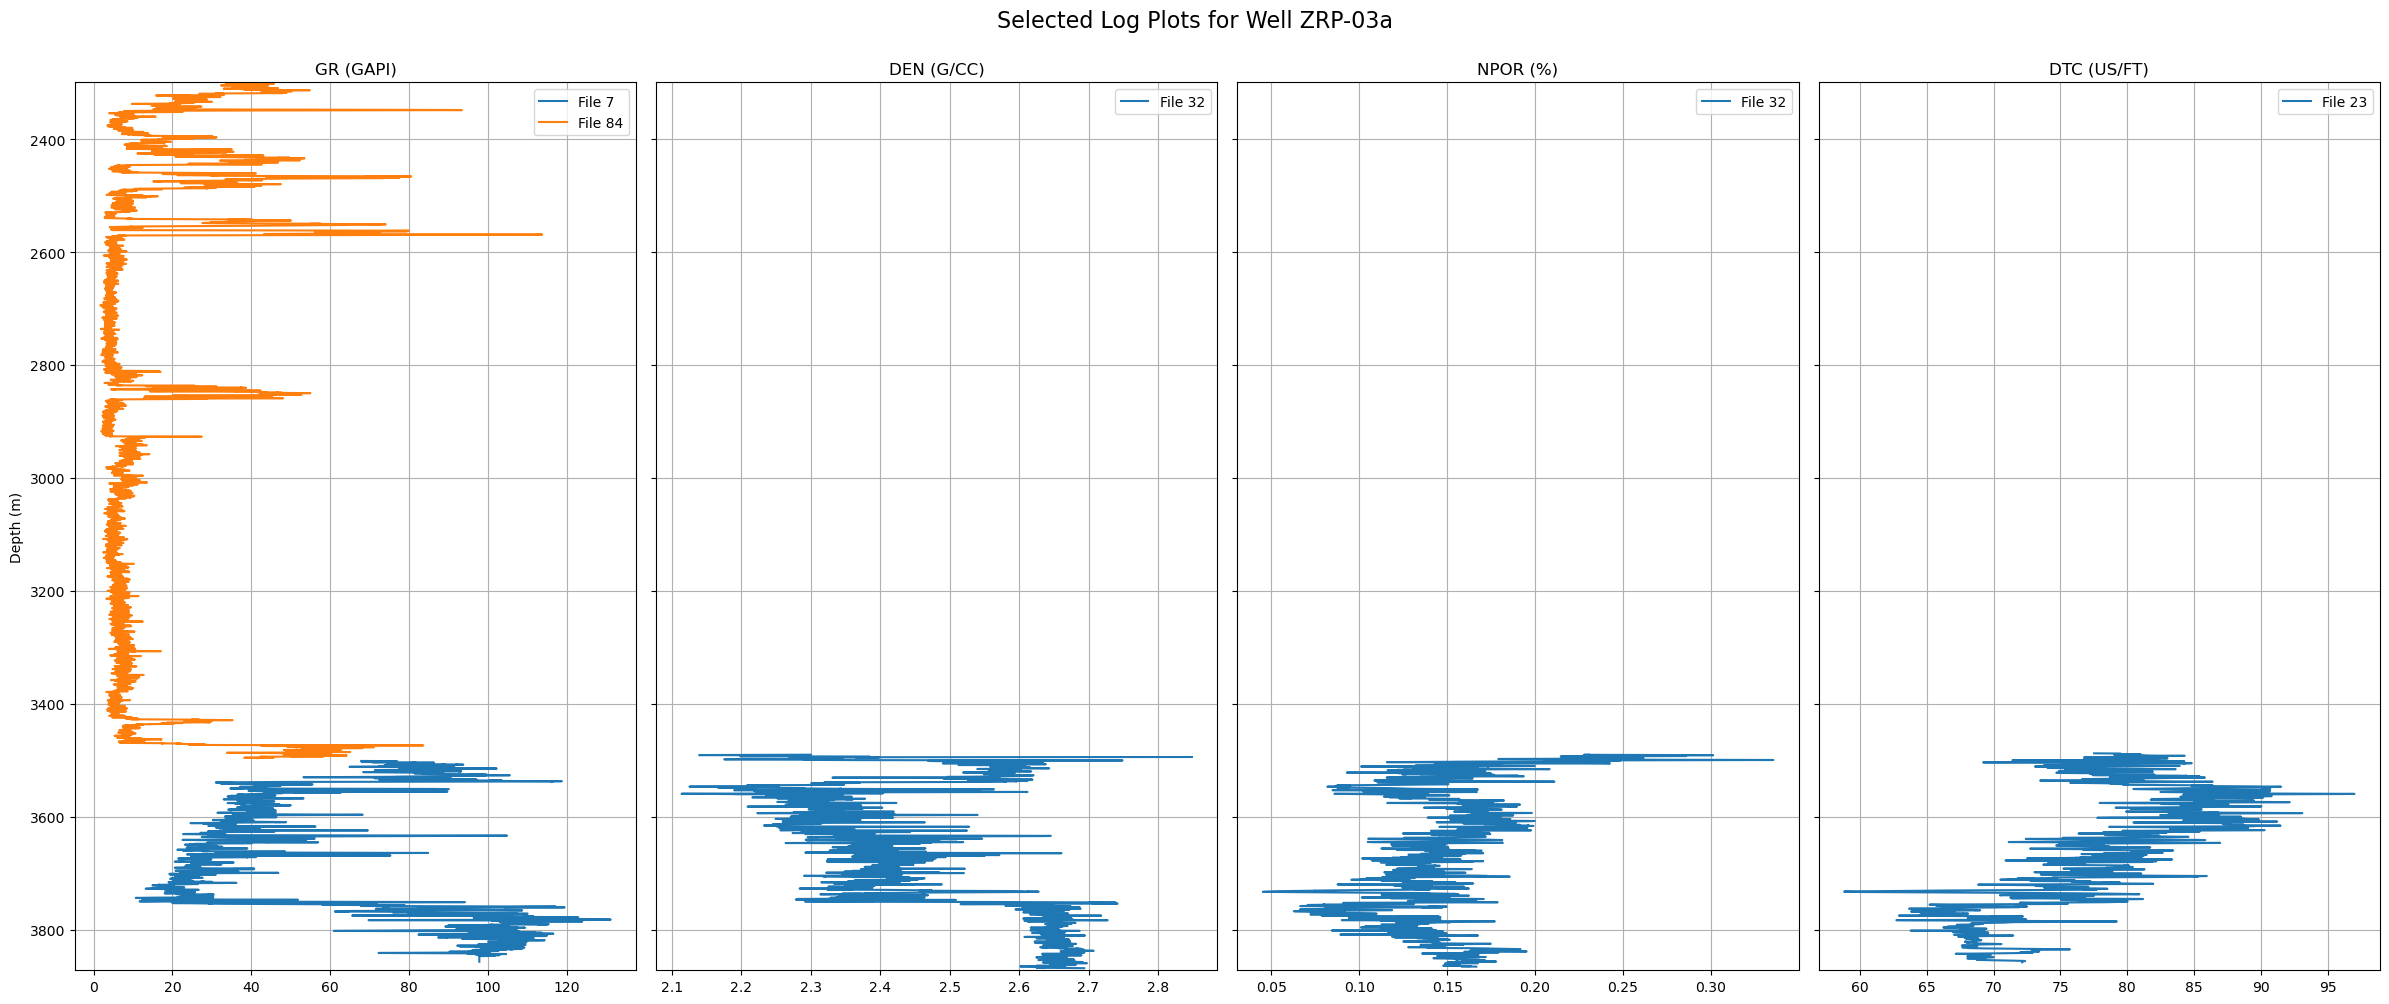

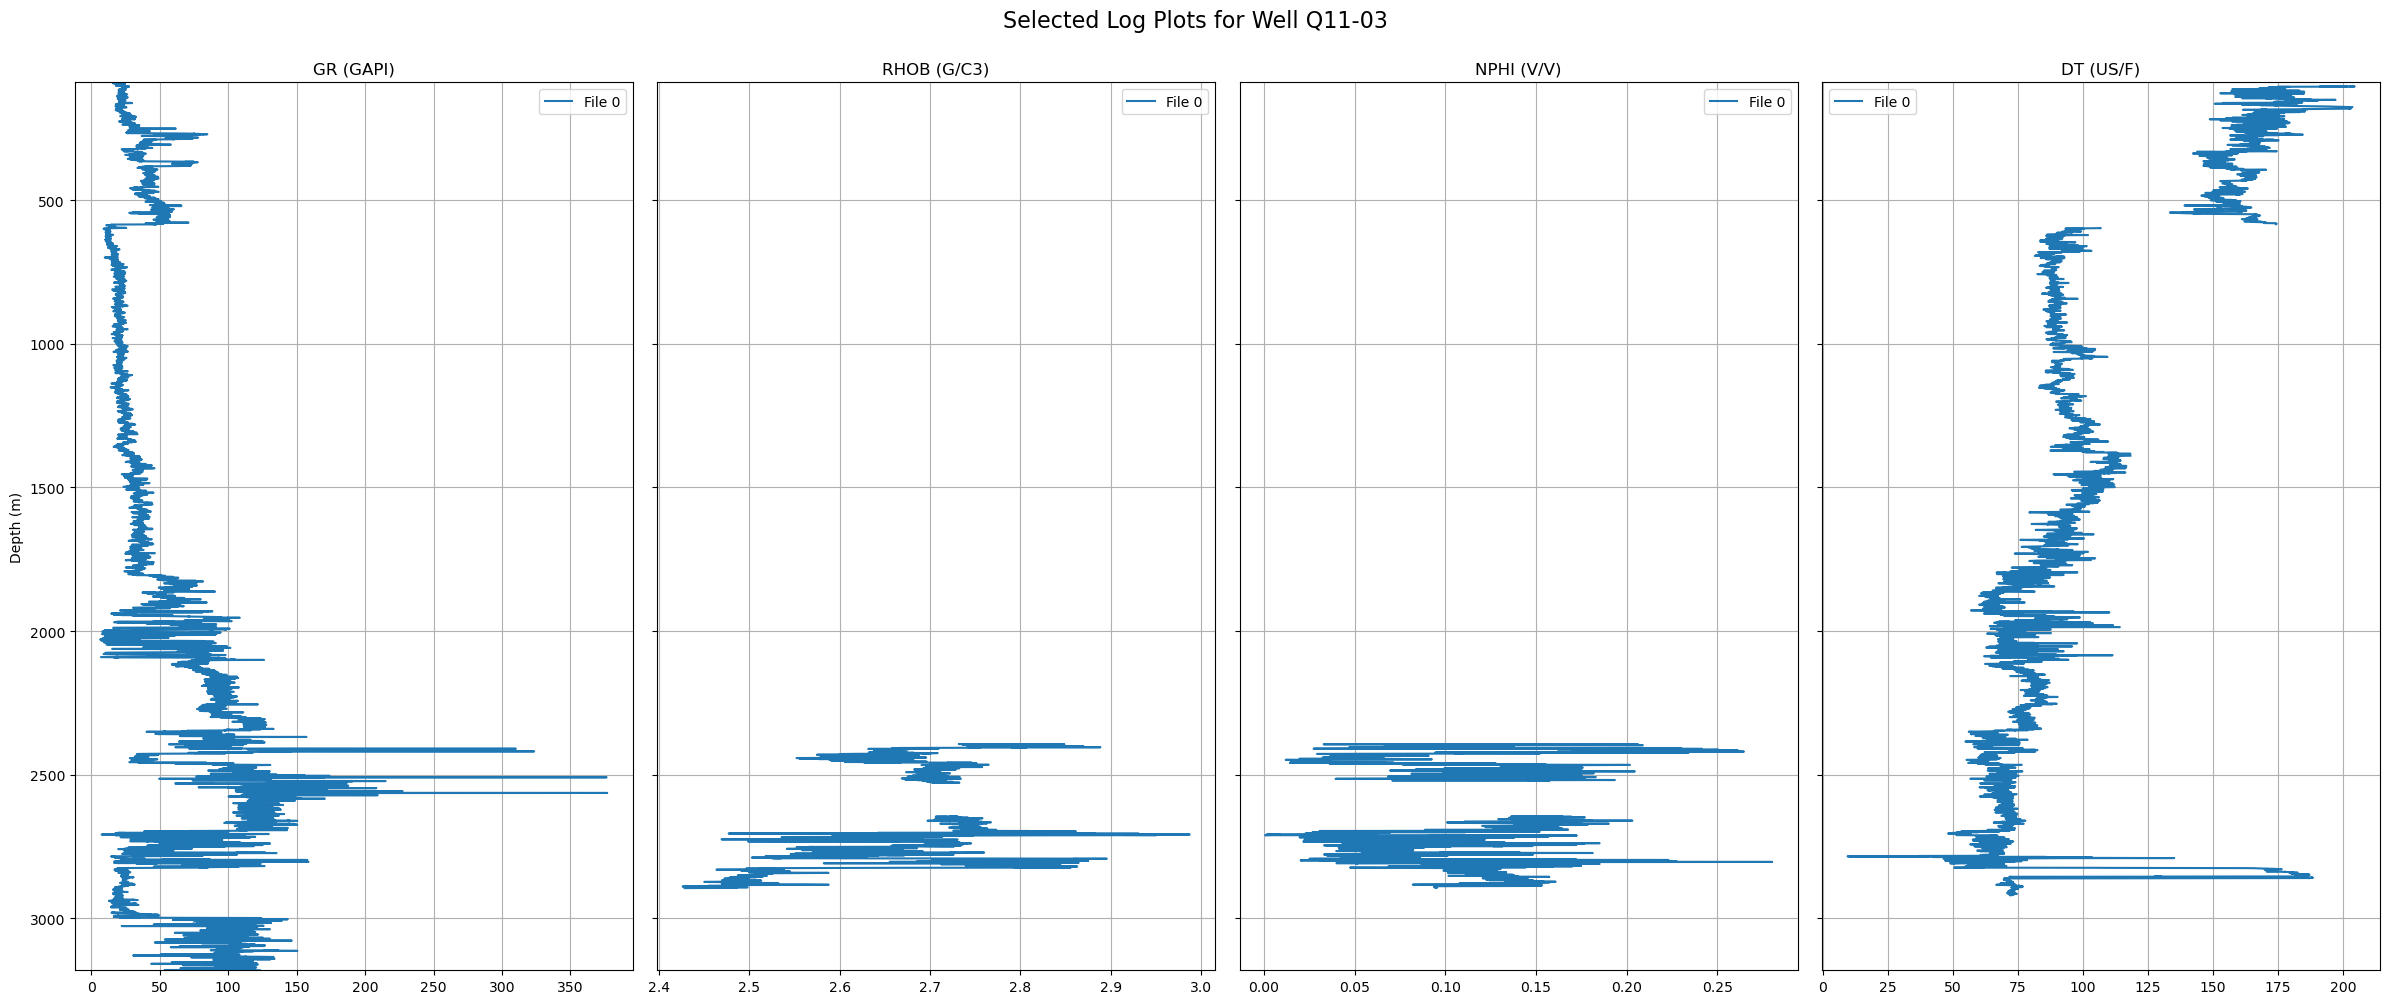

In [7]:
manual_selection = {
    'E18-05': {
        'GR': {
            0: {'depth': (None, None)}
        },
        'RHOB': {
            0: {'depth': (None, None)}
        },
        'NPHI': {
            0: {'depth': (None, None)}
        },
        'DT': {
            0: {'depth': (None, None)}
        },
    },
    'K18-07x': {
        'GR': {
            38: {'depth': (None, None)},
        },
        'DNLS': {
            51: {'depth': (None, None)},
        },
        'PORE': {
            43: {'depth': (None, None)},
        },
        'DT': {
            50: {'depth': (None, None)},
        },
    },
    'K18-08': {
        'GR': {
            53: {'depth': (None, None)},
            58: {'depth': (None, None)},
        },
        'ZDEN': {
            55: {'depth': (None, None)},
        },
        'PORE': {
            57: {'depth': (None, None)},
        },
        'DT': {
            59: {'depth': (None, None)},
        },
    },
    'ZRP-03a': {
        'GR': {
            7: {'depth': (3501.025, None)},  # Depth >= 3501.025 for file 7
            84: {'depth': (None, None)},   
        },
        'DEN': {
            32: {'depth': (None, None)},
        },
        'NPOR': {
            32: {'depth': (None, None)},
        },
        'DTC': {
            23: {'depth': (None, None)},
        },
    },
    'Q11-03': {
        'GR': {
            0: {'depth': (None, None)},
        },
        'RHOB': {
            0: {'depth': (None, None)},
        },
        'NPHI': {
            0: {'depth': (None, None)},
        },
        'DT': {
            0: {'depth': (None, None)},
        },
    },
}

selected_logs = {}
for well_name, logs in manual_selection.items():
    selected_logs[well_name] = select_logs_with_depth(standardized_log_data, well_name, logs)

for well_name in selected_logs.keys():
    plot_selected_logs(selected_logs, well_name)


---

## 9. Step 6: Merge Logs for Each Well

Logs for each well are merged into a unified DataFrame, ensuring all properties are aligned by depth. The final dataset contains columns for:
- `Well_ID`: Identifies the well.
- `Depth`: Depth in meters.
- Properties: Gamma Ray, Bulk Density, Porosity, Sonic Logs, etc.

Rows where all properties are missing are removed to ensure a clean dataset.


In [8]:
final_dataset = merge_logs_for_all_wells(selected_logs, property_mapping)
final_dataset

,Well_ID,Depth,Gamma_Ray,Bulk_Density,Porosity,Sonic_Log
0,E18-05,82.8999,41.651695,NaN,NaN,NaN
1,E18-05,82.9999,41.013695,NaN,NaN,NaN
2,E18-05,83.0999,41.670784,NaN,NaN,NaN
3,E18-05,83.1999,42.615822,NaN,NaN,NaN
4,E18-05,83.2999,42.945969,NaN,NaN,NaN
...,...,...,...,...,...,...
171929,Q11-03,3180.5004,108.495453,NaN,NaN,NaN
171930,Q11-03,3180.6004,114.520721,NaN,NaN,NaN
171931,Q11-03,3180.7004,119.382233,NaN,NaN,NaN
171932,Q11-03,3180.8004,122.320145,NaN,NaN,NaN


---

## 10. Step 7: Visualize Final Properties

The final visualizations validate the merged dataset. Check for:
- Consistency in depth coverage across properties.
- Proper alignment of properties within each well.
- Any remaining gaps or anomalies in the data.


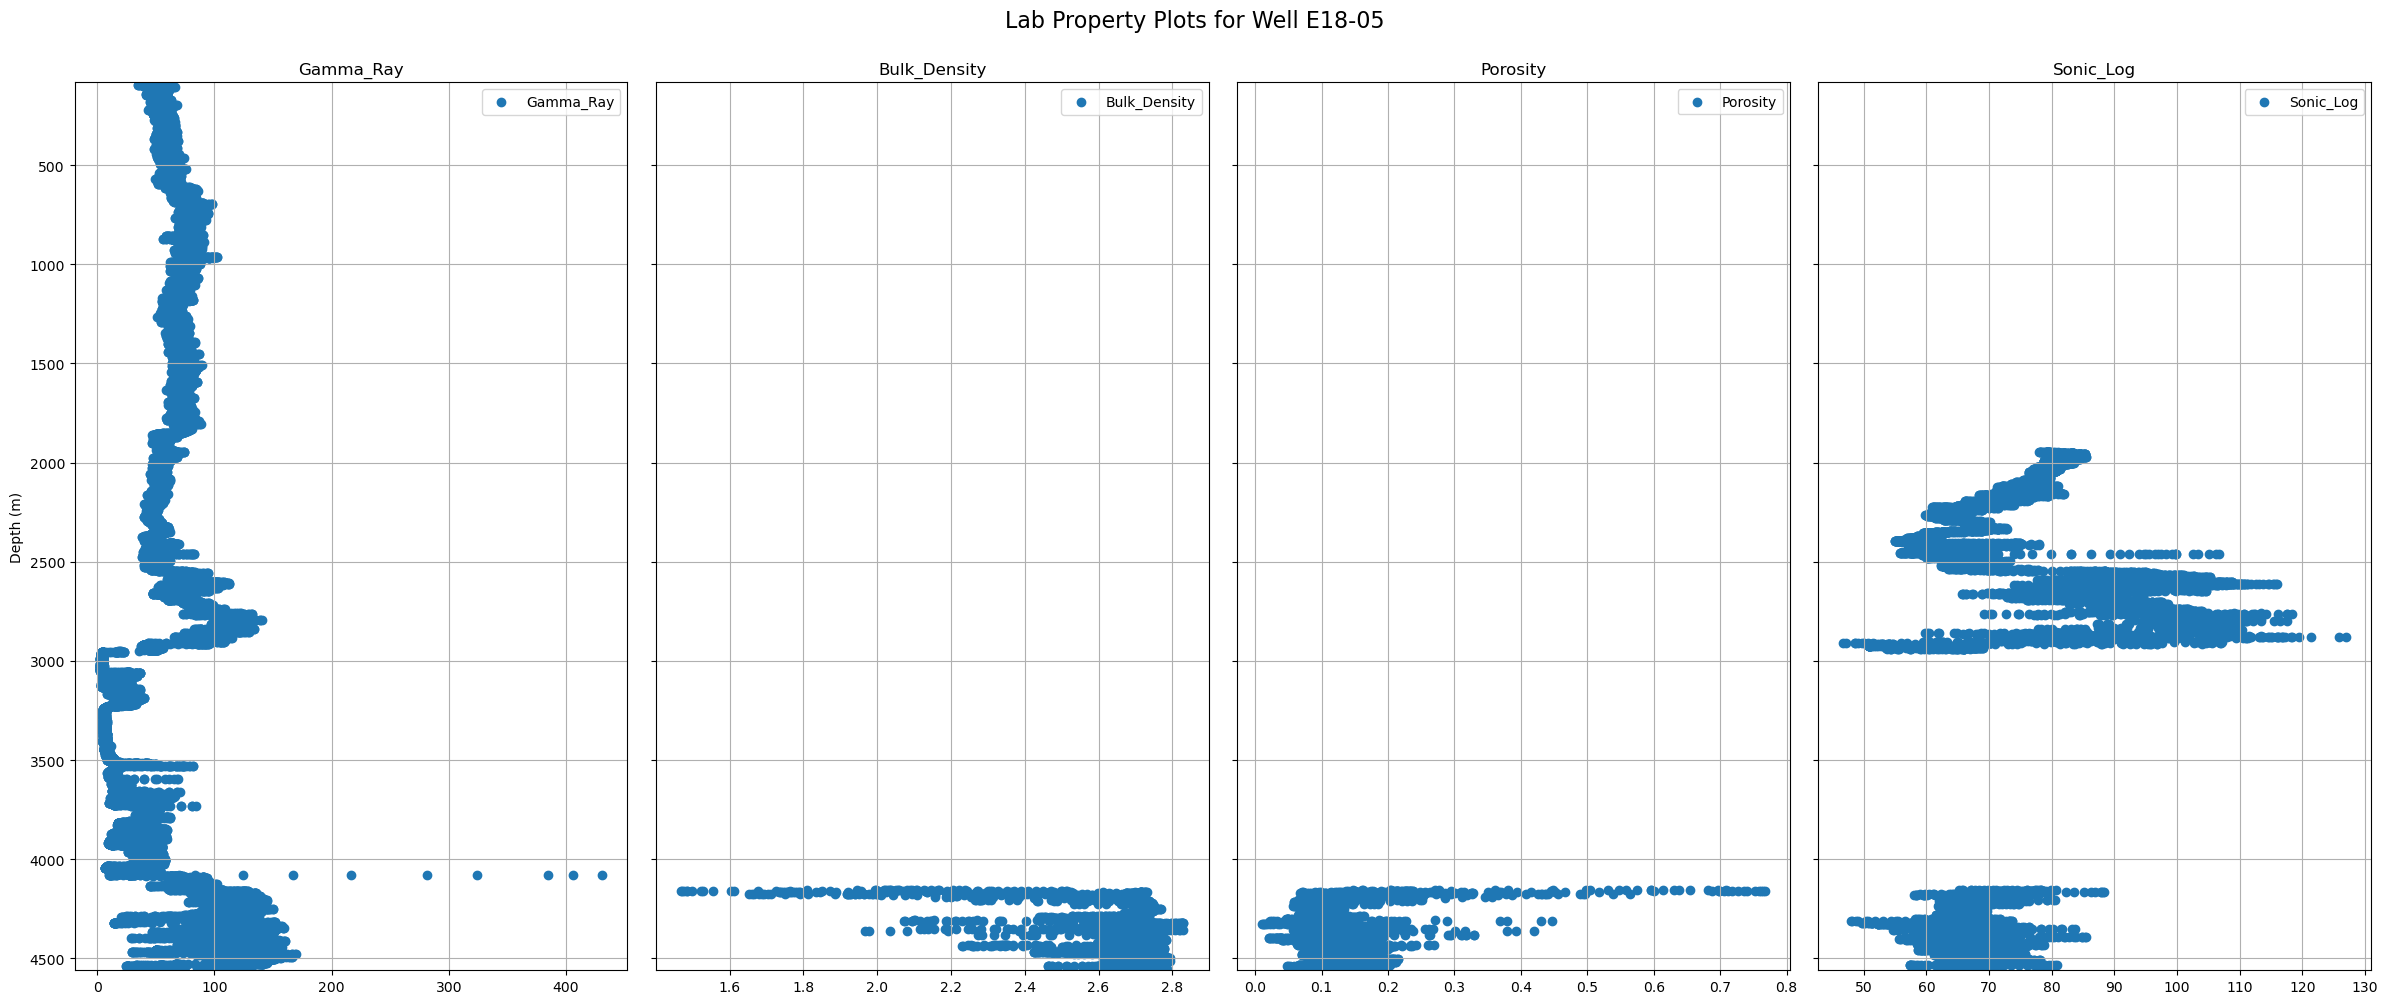

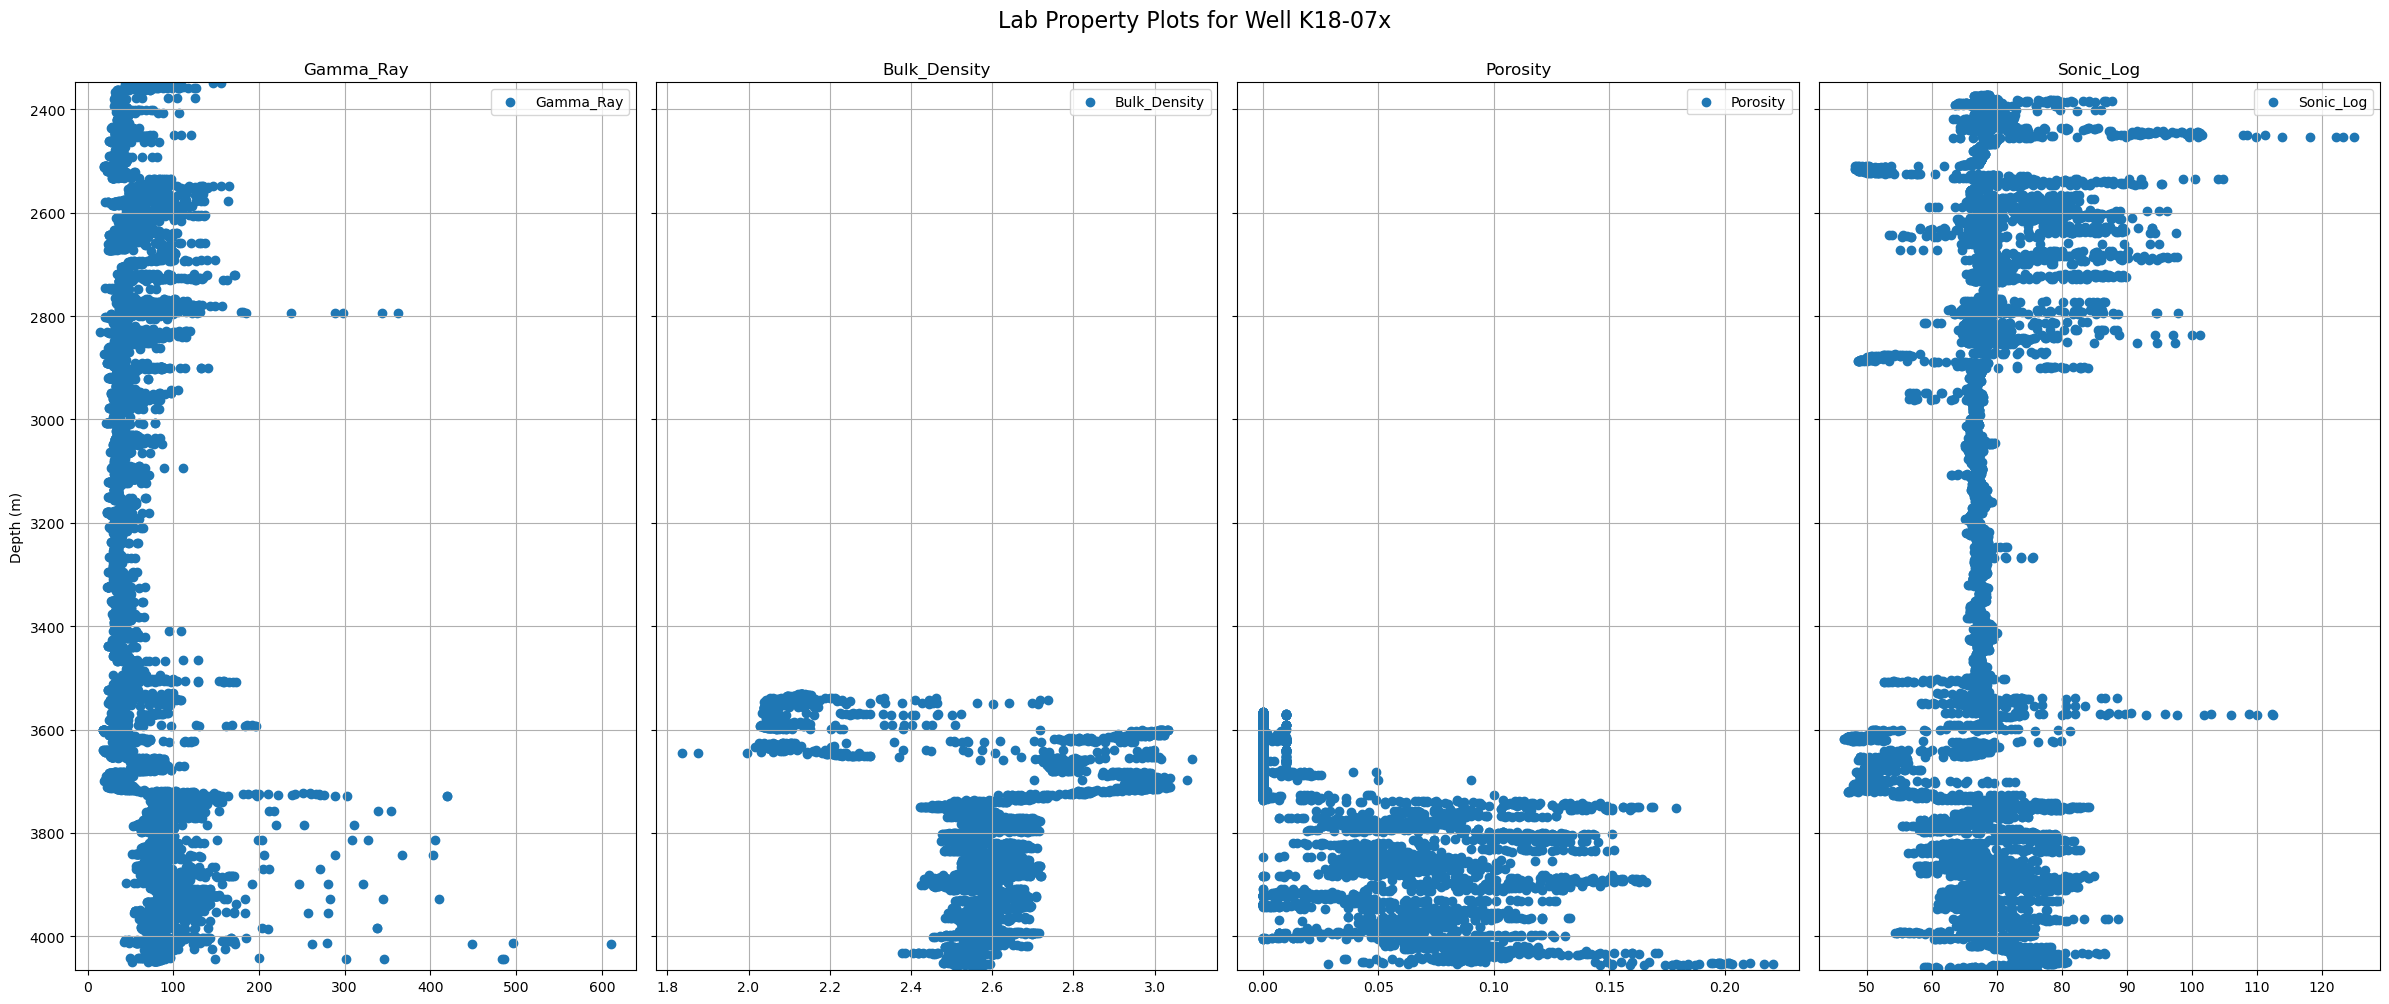

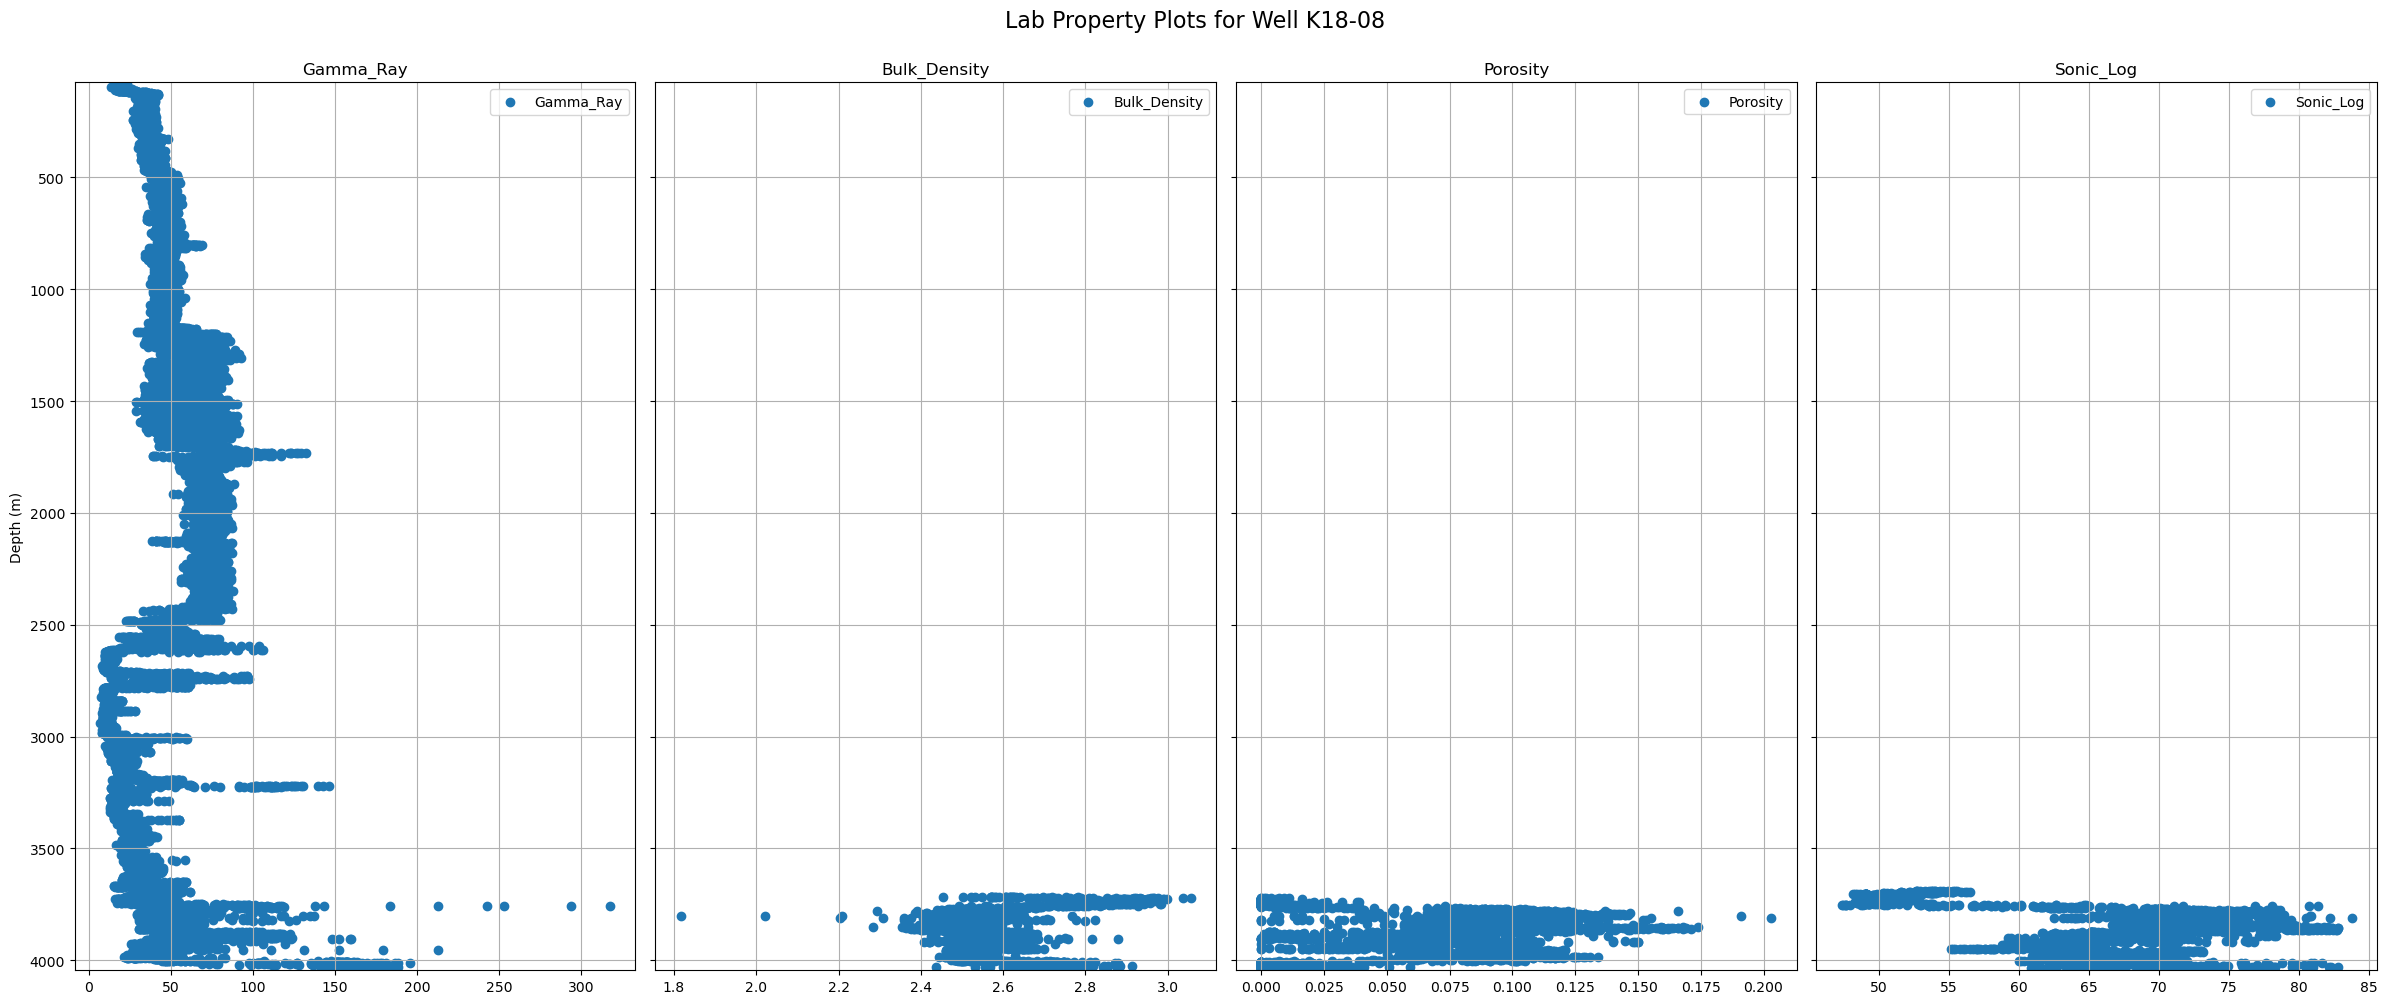

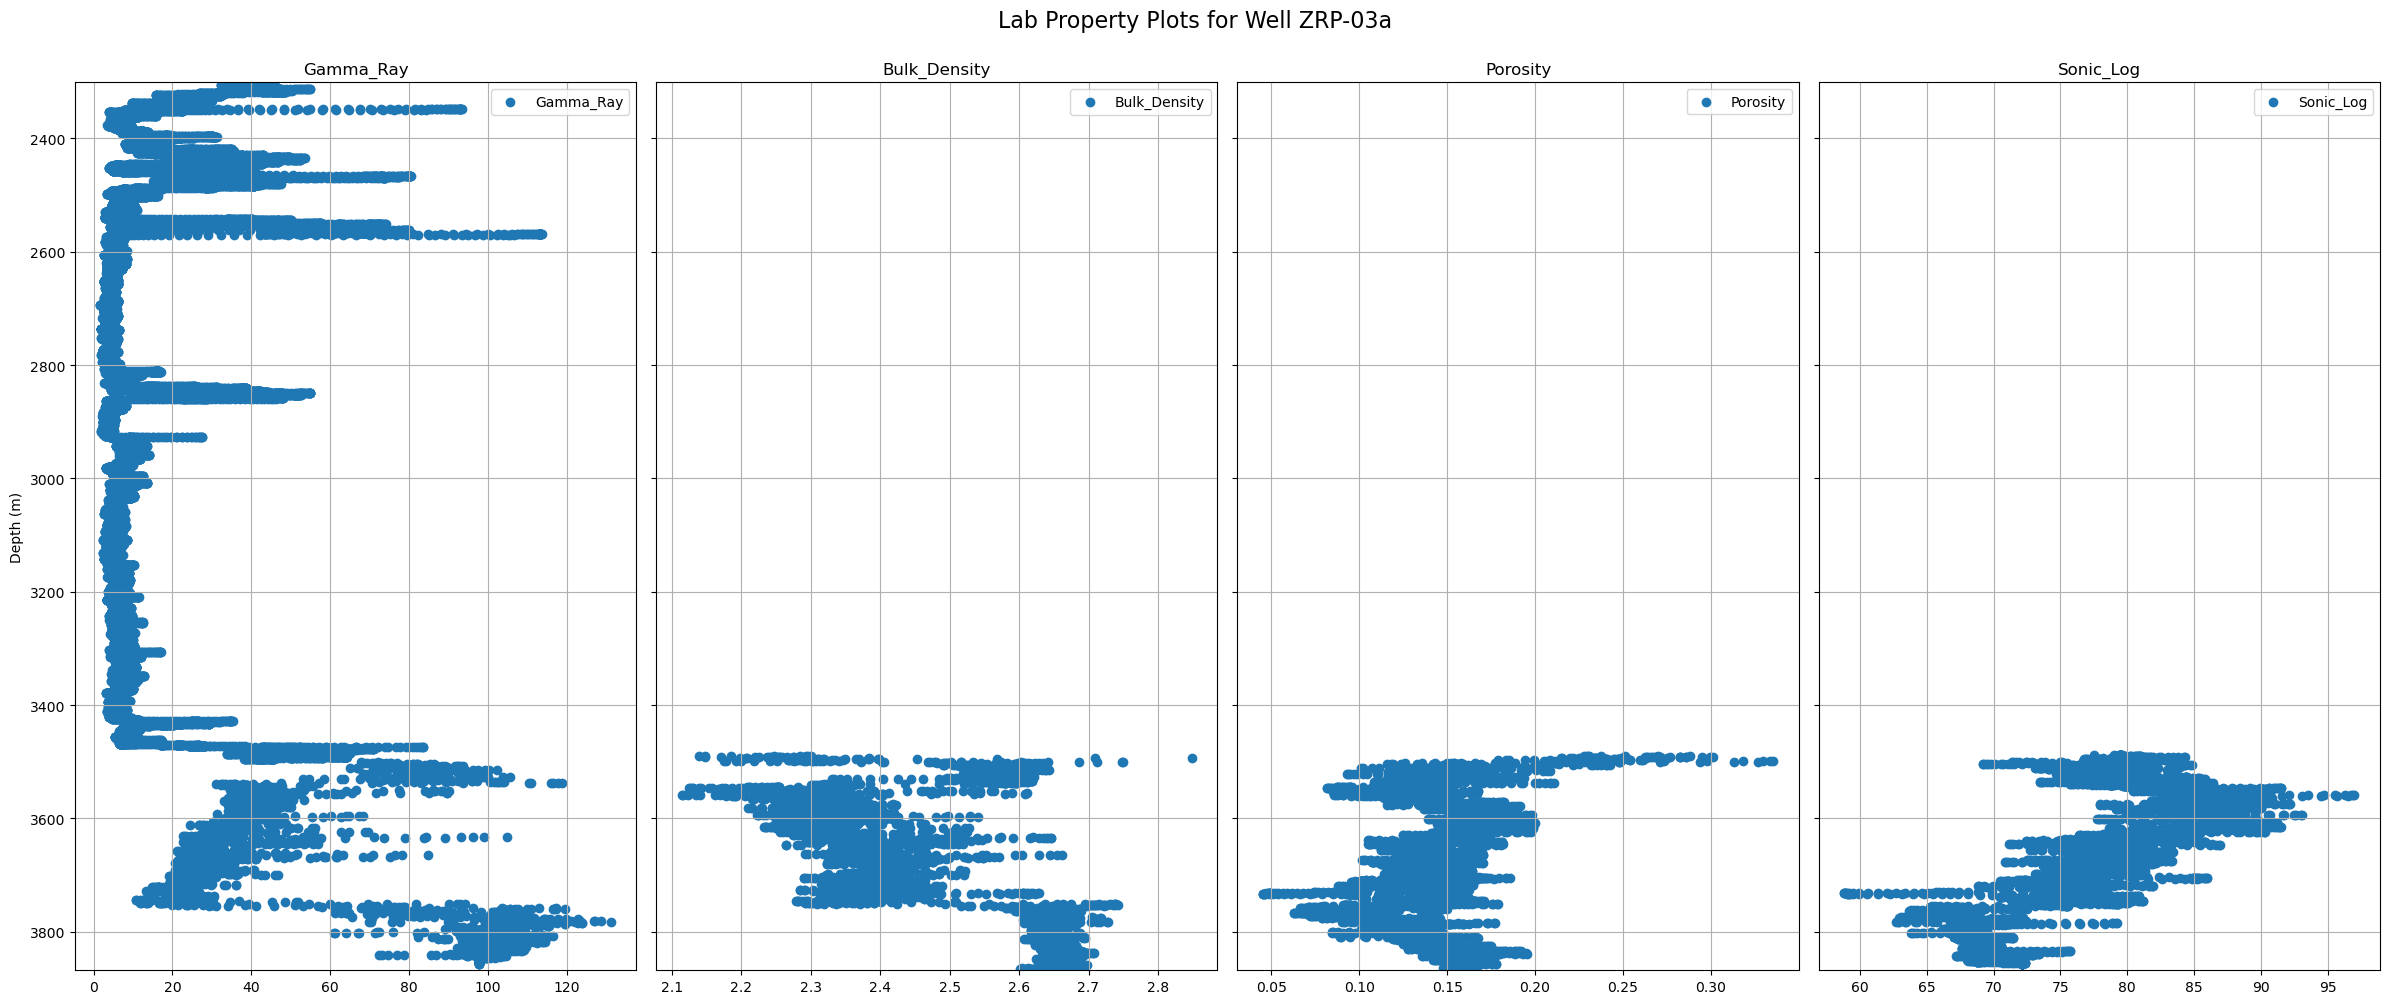

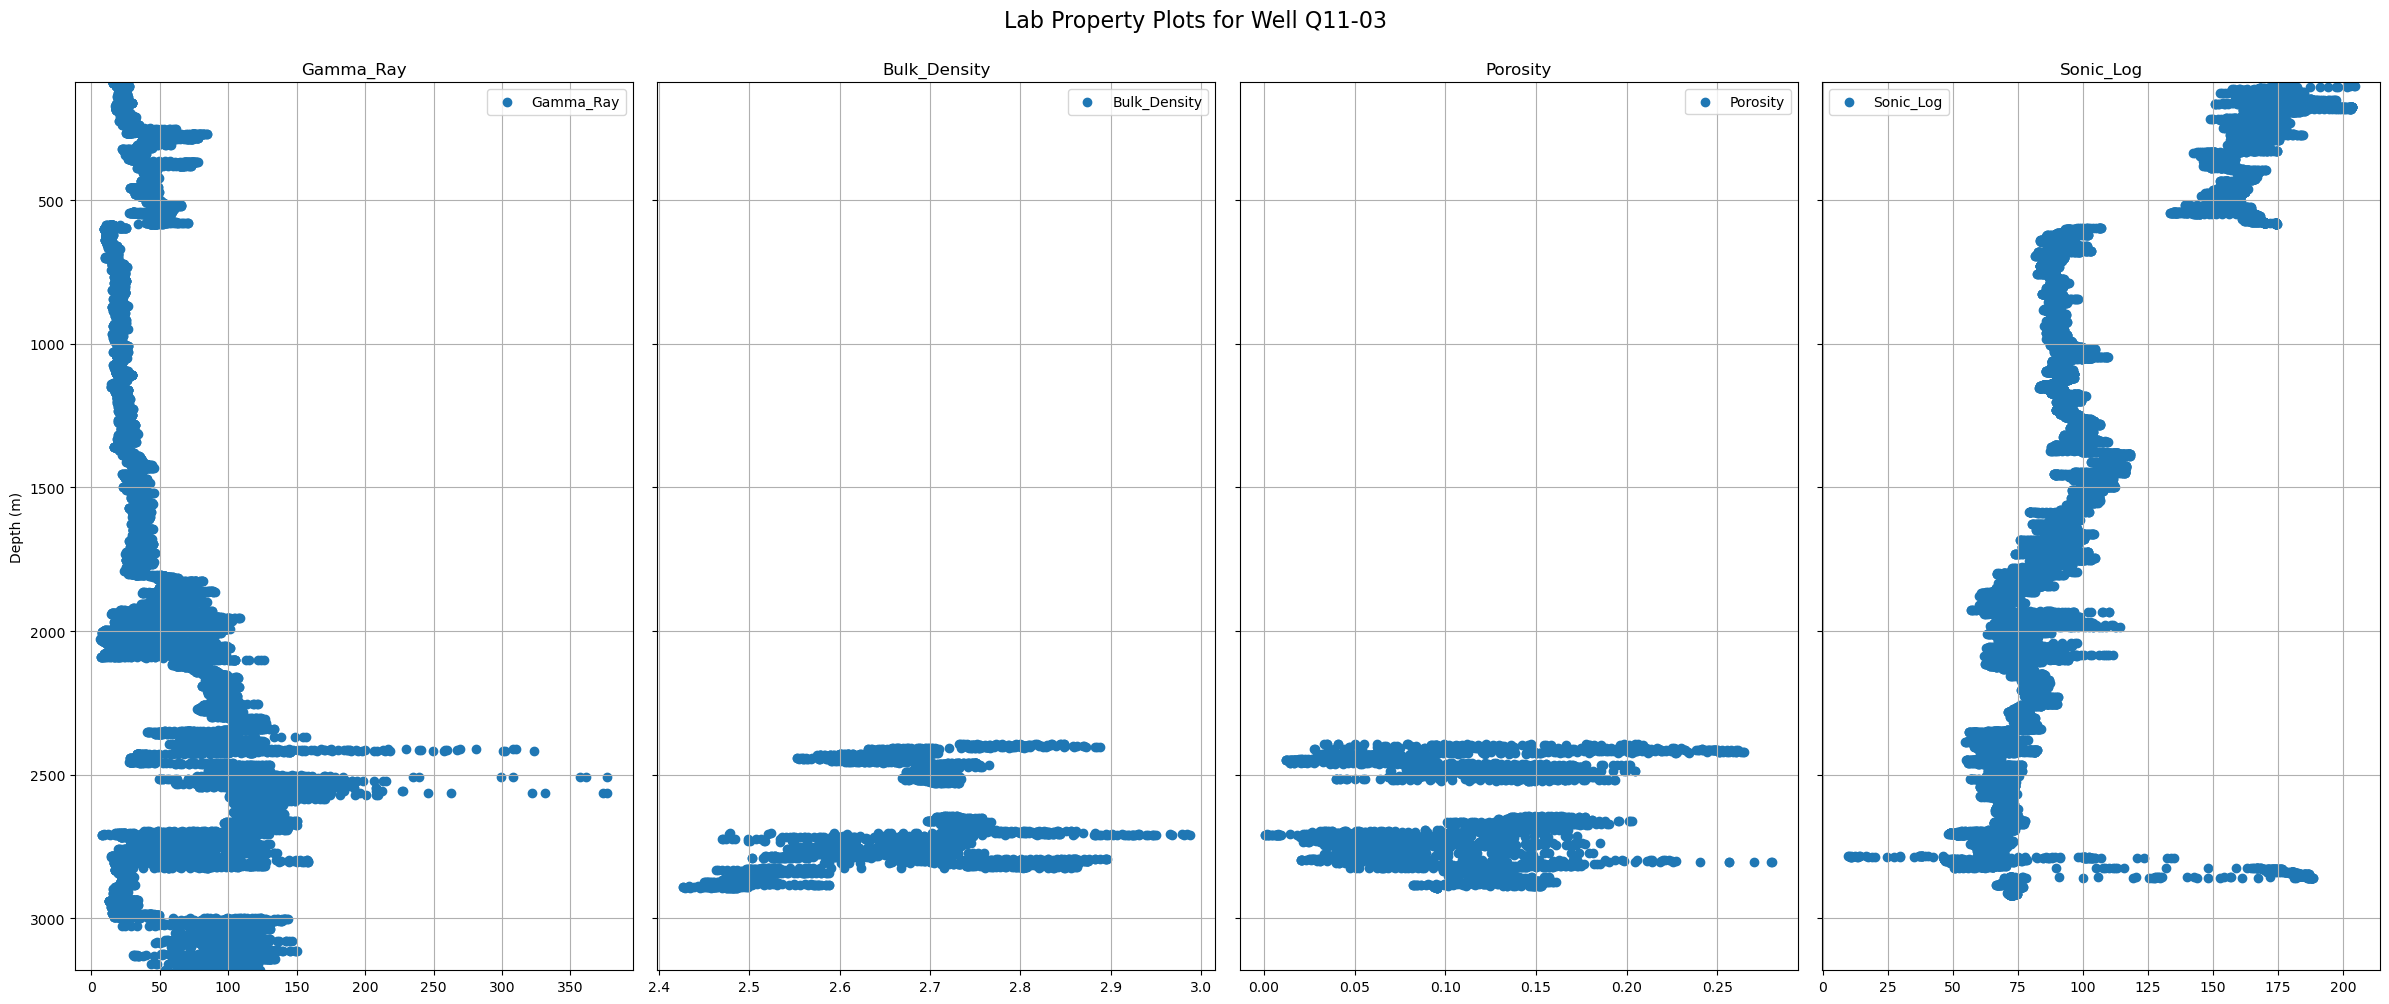

In [9]:
for well_name in final_dataset['Well_ID'].unique():
    plot_properties_by_well(final_dataset, well_name, property_mapping)

---

## 11. Step 8: Save Final Dataset

The final dataset is saved as a CSV file for use in downstream analysis. This dataset will serve as the foundation for machine learning applications.


In [10]:
save_to_csv(final_dataset, 'final_well_logs', 'data/processed/')

File saved successfully
